<h1>지도학습
</h1>

<h2>SVM</h2>

In [16]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from matplotlib import rc
import matplotlib

rc("font", family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False
X, y = make_blobs(centers=4,  random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#plt.xlabel("특성 0", fontproperties=fontprop)
#plt.ylabel("특성 1", fontproperties=fontprop)

plt.xlabel("특성 0")
plt.ylabel("특성 1")


Text(0, 0.5, '특성 1')

Text(0, 0.5, '특성 1')

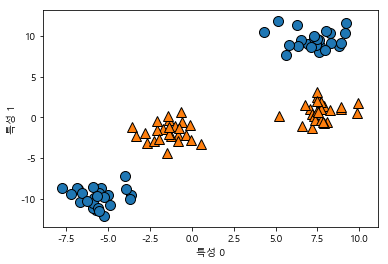

In [17]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from matplotlib import rc
import matplotlib

rc("font", family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False
X, y = make_blobs(centers=4,  random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#plt.xlabel("특성 0", fontproperties=fontprop)
#plt.ylabel("특성 1", fontproperties=fontprop)

plt.xlabel("특성 0")
plt.ylabel("특성 1")


C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '특성 1')

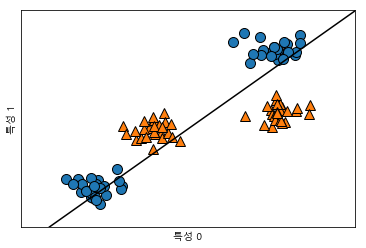

In [18]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


Text(0.5, 0, '특성 1 ** 2')

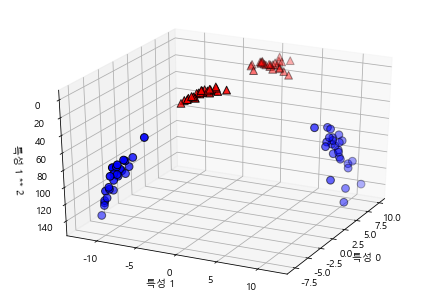

In [19]:
from mpl_toolkits.mplot3d import Axes3D, axes3d


X_new = np.hstack([X, X[:, 1:] ** 2])
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")

C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

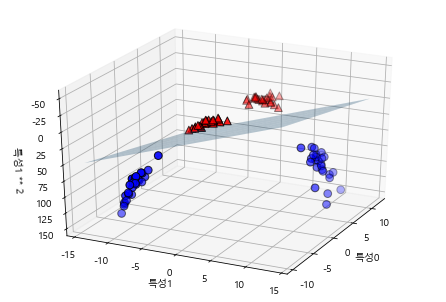

In [20]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", marker="^", cmap=mglearn.cm2, s=60, edgecolor="k")
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(-0.029552224598906645, -0.08796854149551622, '특성1')

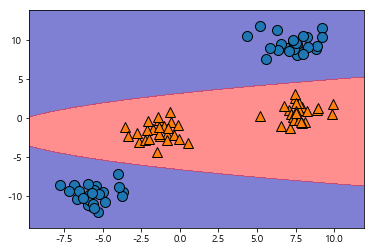

In [21]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")

Text(0, 0.5, '특성1')

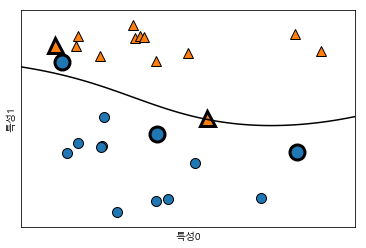

In [22]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성0")
plt.ylabel("특성1")

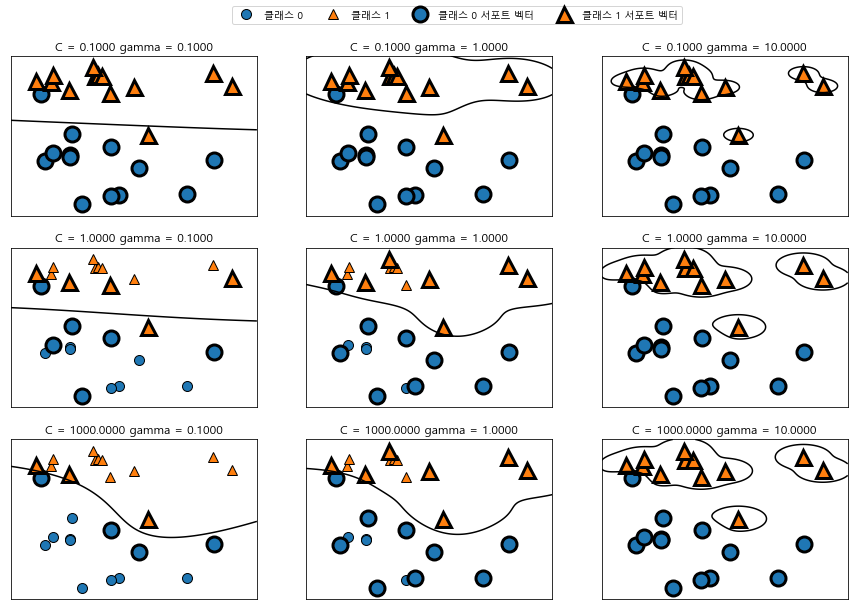

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("훈련세트정확도", svc.score(X_train, y_train))
print("테스트세트정확도", svc.score(X_test, y_test))

훈련세트정확도 1.0
테스트세트정확도 0.6293706293706294


C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0, 0.5, '특성 크기')

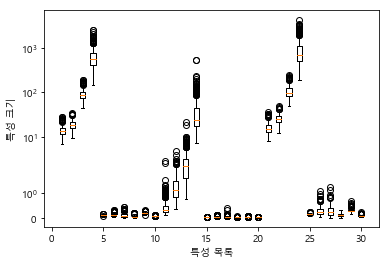

In [25]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

In [26]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별최소값", X_train_scaled.min(axis=0))
print("특성별최대값", X_train_scaled.max(axis=0))

특성별최소값 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별최대값 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [27]:
X_test_scaled = (X_test - min_on_training)/ range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도", svc.score(X_train_scaled, y_train))
print("테스트세트 정확도", svc.score(X_test_scaled, y_test))

훈련 세트 정확도 0.9483568075117371
테스트세트 정확도 0.951048951048951


C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
X_test_scaled = (X_test - min_on_training)/ range_on_training

svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도", svc.score(X_train_scaled, y_train))
print("테스트세트 정확도", svc.score(X_test_scaled, y_test))

훈련 세트 정확도 0.9882629107981221
테스트세트 정확도 0.972027972027972


C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<h1>지도학습2</h1>

<h2>나이브 베이즈</h2>

In [29]:
from numpy import *

def loadDataSet():
    postingList=[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
                 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]
    classVec = [0,1,0,1,0,1]
    return postingList,classVec
                 
def createVocabList(dataSet):
    vocabSet = set([])
    for document in dataSet:
        vocabSet = vocabSet | set(document)
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else:
            print(f"the word: {word} is not in my Vocabulary!")
    return returnVec

In [30]:
listOPosts, listClasses = loadDataSet()

In [31]:
listOPosts

[['my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
 ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
 ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
 ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
 ['mr', 'licks', 'ate', 'my', 'steak', 'how', 'to', 'stop', 'him'],
 ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

In [32]:
myVocabList = createVocabList(listOPosts)

In [33]:
myVocabList

['maybe',
 'so',
 'love',
 'quit',
 'problems',
 'him',
 'dalmation',
 'cute',
 'food',
 'not',
 'mr',
 'to',
 'is',
 'steak',
 'flea',
 'garbage',
 'my',
 'I',
 'licks',
 'buying',
 'park',
 'dog',
 'take',
 'help',
 'please',
 'stop',
 'how',
 'ate',
 'stupid',
 'posting',
 'worthless',
 'has']

In [34]:
setOfWords2Vec(myVocabList, listOPosts[0])

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [35]:
def trainNBO(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    print(numWords)
    pAbusive = sum(trainCategory)/float(numTrainDocs)
    p0Num = zeros(numWords)
    p1Num = zeros(numWords)
    p0Denom = 0.0
    p1Denom = 0.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = (p1Num/p1Denom)
    p0Vect = (p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive


In [36]:
def trainNBO(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs)
    p0Num = ones(numWords)
    p1Num = ones(numWords)
    p0Denom = 2.0
    p1Denom = 2.0
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i]
            p1Denom += sum(trainMatrix[i])
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = log(p1Num/p1Denom)
    p0Vect = log(p0Num/p0Denom)
    print(sum(p0Vect))
    print(sum(p1Vect))
    return p0Vect,p1Vect,pAbusive


In [37]:
trainMat=[]
for postinDoc in listOPosts:
    trainMat.append(setOfWords2Vec(myVocabList, postinDoc))

In [38]:
p0V, p1V, pAb = trainNBO(trainMat, listClasses)

-88.60438613626047
-85.52343290197408


In [39]:
pAb

0.5

In [40]:
p0V

array([-3.25809654, -2.56494936, -2.56494936, -3.25809654, -2.56494936,
       -2.15948425, -2.56494936, -2.56494936, -3.25809654, -3.25809654,
       -2.56494936, -2.56494936, -2.56494936, -2.56494936, -2.56494936,
       -3.25809654, -1.87180218, -2.56494936, -2.56494936, -3.25809654,
       -3.25809654, -2.56494936, -3.25809654, -2.56494936, -2.56494936,
       -2.56494936, -2.56494936, -2.56494936, -3.25809654, -3.25809654,
       -3.25809654, -2.56494936])

In [41]:
p1V

array([-2.35137526, -3.04452244, -3.04452244, -2.35137526, -3.04452244,
       -2.35137526, -3.04452244, -3.04452244, -2.35137526, -2.35137526,
       -3.04452244, -2.35137526, -3.04452244, -3.04452244, -3.04452244,
       -2.35137526, -3.04452244, -3.04452244, -3.04452244, -2.35137526,
       -2.35137526, -1.94591015, -2.35137526, -3.04452244, -3.04452244,
       -2.35137526, -3.04452244, -3.04452244, -1.65822808, -2.35137526,
       -1.94591015, -3.04452244])

In [42]:
 
 
def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    p1 = sum(vec2Classify * p1Vec) + log(pClass1)
    p0 = sum(vec2Classify * p0Vec) + log(1.0-pClass1)
    print(p0,p1)
    if p1 > p0:
        return 1
    else:
        return 0
 
def testNB():
    listOPosts,listClasses = loadDataSet()
    #myVocabList = createVocabList(listOPosts)
    #trainMat = []
    #for postinDoc in listOPosts:
    #    trainMat.append(setOfWords2Vec(myVocabList,postinDoc))
    #p0V,p1V,pAb = trainNBO(array(trainMat),array(listClasses))
    testEntry = ["love","my","dalmation","jinman"]
    thisDoc = array(setOfWords2Vec(myVocabList,testEntry))
    print (testEntry,"classified as:",classifyNB(thisDoc,p0V,p1V,pAb))
    testEntry = ["stupid", "garbage"]
    thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
    print (testEntry,"classified as:",classifyNB(thisDoc,p0V,p1V,pAb))
testNB()

the word: jinman is not in my Vocabulary!
-7.694848072384611 -9.826714493730215
['love', 'my', 'dalmation', 'jinman'] classified as: 0
-7.20934025660291 -4.702750514326955
['stupid', 'garbage'] classified as: 1


In [43]:
testEntry = ["love", "stupid"]
thisDoc = array(setOfWords2Vec(myVocabList, testEntry))
print (testEntry,"classified as:",classifyNB(thisDoc,p0V,p1V,pAb))

-6.516193076042964 -5.395897694886901
['love', 'stupid'] classified as: 1


<h2>Performance Evaluation</h2>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [45]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Posivitv Rate")
    plt.legend()
    plt.show()

In [46]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1, 1], random_state=1)
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)
#model = KNeighborsClassifier()
model = RandomForestClassifier()
model.fit(trainX, trainy)

C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
probs = model.predict_proba(testX)
probs = probs[:, 1]

In [48]:
roc = roc_curve(testy, probs)
print("ROC", roc)
auc = roc_auc_score(testy, probs)
print("AUC", auc)

ROC (array([0.        , 0.04225352, 0.07042254, 0.0915493 , 0.11267606,
       0.11971831, 0.14084507, 0.18309859, 0.26760563, 0.33098592,
       0.54225352, 1.        ]), array([0.        , 0.29746835, 0.58860759, 0.73417722, 0.82911392,
       0.90506329, 0.93670886, 0.96202532, 0.98734177, 0.98734177,
       0.99367089, 1.        ]), array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))
AUC 0.9254323408807275


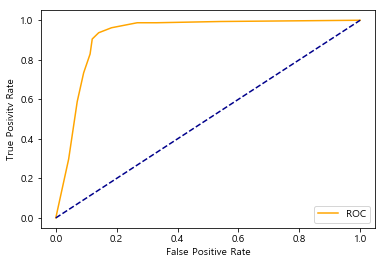

In [49]:
fpr, tpr, theshholds = roc_curve(testy, probs)
plot_roc_curve(fpr, tpr)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier


iris  = load_iris()
KNN = KNeighborsClassifier()
scores = cross_val_score(KNN, iris.data, iris.target)
print("교차 검증 점수", scores)

교차 검증 점수 [0.98039216 0.98039216 1.        ]


C:\Users\Affinity\.conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [51]:
scores = cross_val_score(KNN, iris.data, iris.target, cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [52]:
scores.mean()

0.9733333333333334

In [53]:
from sklearn.model_selection import cross_validate


res = cross_validate(KNN, iris.data, iris.target, cv=5, return_train_score=True)
display(res)

{'fit_time': array([0.        , 0.        , 0.00099683, 0.        , 0.        ]),
 'score_time': array([0.00199246, 0.00103617, 0.00099635, 0.00096178, 0.00102544]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

In [54]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
from sklearn.model_selection import LeaveOneOut


loo = LeaveOneOut()
scores = cross_val_score(KNN, iris.data, iris.target, cv=loo)
print(len(scores))
print(scores.mean())

150
0.9666666666666667


In [56]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(KNN, iris.data, iris.target, cv=shuffle_split)
print(scores)

[1.         0.96       0.96       0.96       0.97333333 0.96
 0.94666667 0.98666667 0.96       0.94666667]


In [57]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold


rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(KNN, iris.data, iris.target, cv=rskfold)
print(scores)
scores.mean()

[0.96666667 0.96666667 0.96666667 0.93333333 1.         0.93333333
 1.         0.96666667 0.96666667 0.93333333 0.96666667 0.96666667
 1.         0.96666667 0.93333333 1.         0.96666667 0.96666667
 0.86666667 0.96666667 0.96666667 0.96666667 0.96666667 1.
 0.96666667 1.         0.93333333 0.96666667 0.96666667 0.96666667
 0.93333333 0.96666667 1.         1.         0.96666667 0.9
 0.96666667 0.96666667 1.         1.         0.96666667 0.96666667
 1.         0.93333333 0.93333333 0.96666667 0.96666667 0.93333333
 1.         0.96666667]


0.9653333333333335

<h2>그리드</h2>

In [58]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)
print("훈련 세트의 크기: {}   테스트 세트의 크기: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 테스트 세트로 SVC를 평가합니다
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: {}".format(best_parameters))

훈련 세트의 크기: 112   테스트 세트의 크기: 38
최고 점수: 0.97
최적 파라미터: {'C': 100, 'gamma': 0.001}


In [59]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


<h2>Kaggle</h2>

In [60]:
import pandas as pd

titanic = pd.read_csv("l_d/p3/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [62]:
titanic["Survived"] = titanic["Survived"].astype(object)
titanic["Pclass"] = titanic["Pclass"].astype(object)

In [63]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
missing_df = titanic.isnull().sum().reset_index()
missing_df.columns = ["column", "count"]
missing_df["ratio"] = missing_df["count"] / titanic.shape[0]
missing_df.loc[missing_df["ratio"] != 0]

,column,count,ratio
10,Cabin,687,0.771044
11,Embarked,2,0.002245


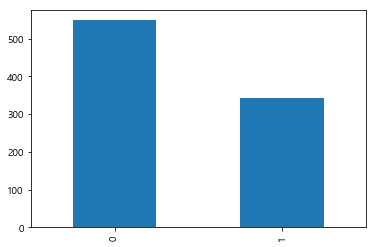

In [65]:
titanic["Survived"].value_counts().plot(kind="bar")
plt.show()

In [66]:
category_feature = [col for col in titanic.columns if
                   titanic[col].dtypes == "object"]
category_feature

['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [67]:
category_feature = list(set(category_feature) - set(["Survived"]))
category_feature

['Pclass', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Name']

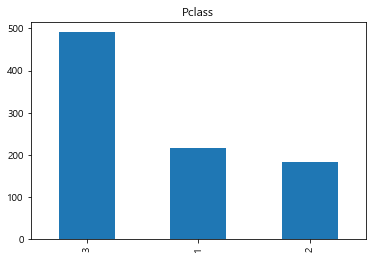

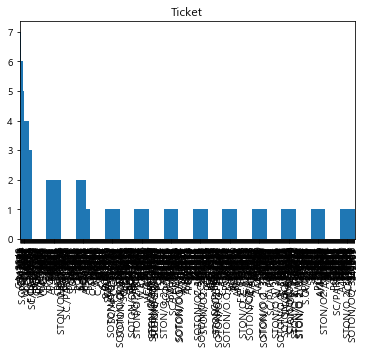

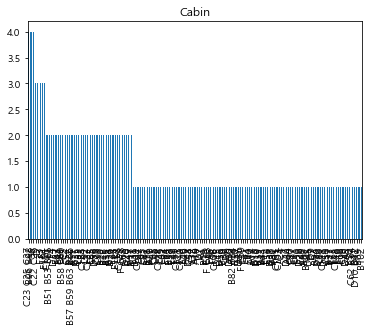

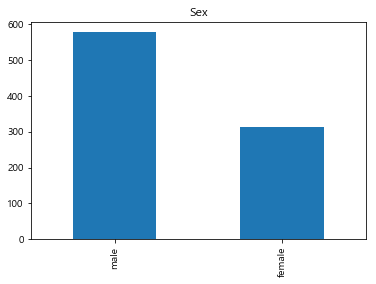

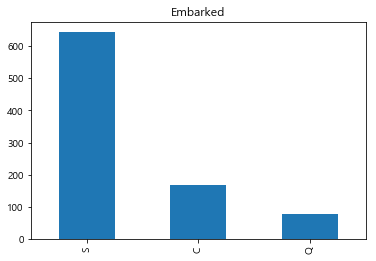

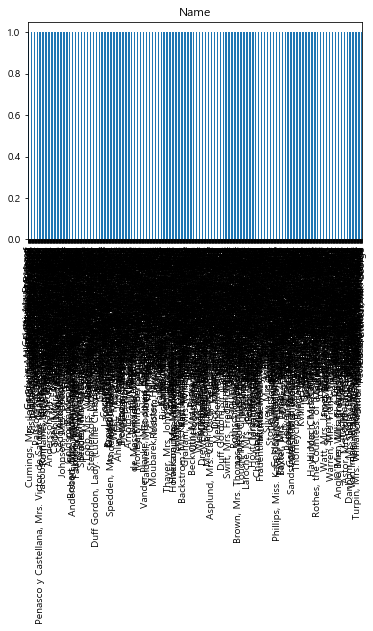

In [68]:
for col in category_feature:
    titanic[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.show()

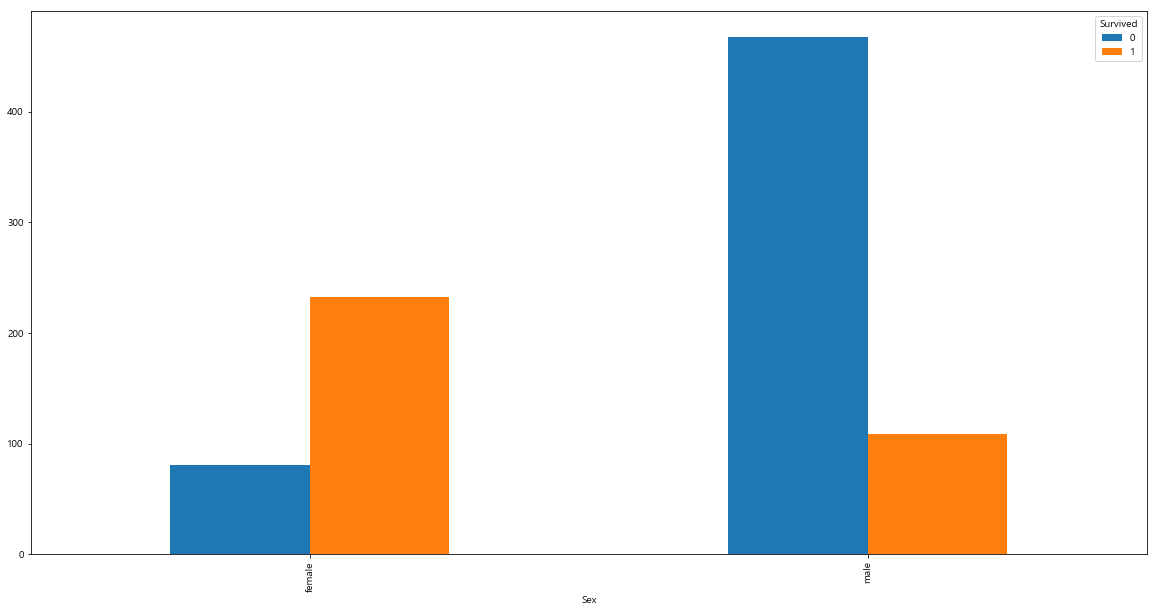

In [69]:
sex_df = titanic.groupby(["Sex", "Survived"])["Survived"].count().unstack("Survived")
sex_df.plot(kind="bar", figsize=(20, 10))
plt.show()

In [70]:
numerical_feature = list(set(titanic.columns) - set(category_feature) - set(["PassengerId", "Survived"]))
numerical_feature = np.sort(numerical_feature)
numerical_feature

array(['Age', 'Fare', 'Parch', 'SibSp'], dtype='<U5')

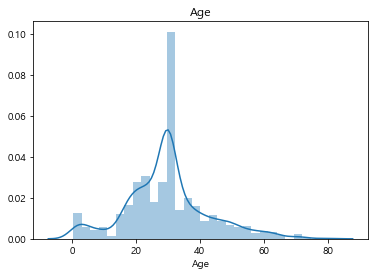

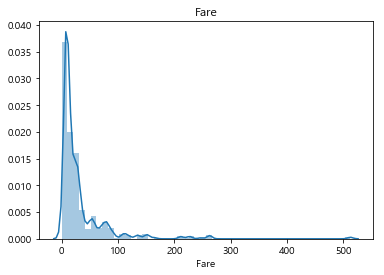

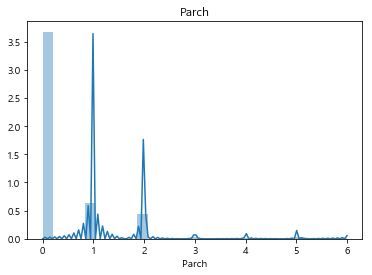

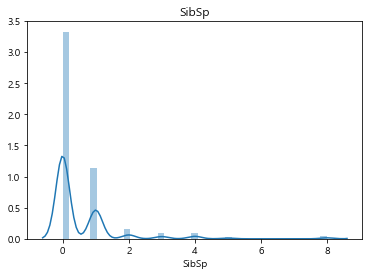

In [71]:
for col in numerical_feature:
    sns.distplot(titanic.loc[titanic[col].notnull(), col])
    plt.title(col)
    plt.show()

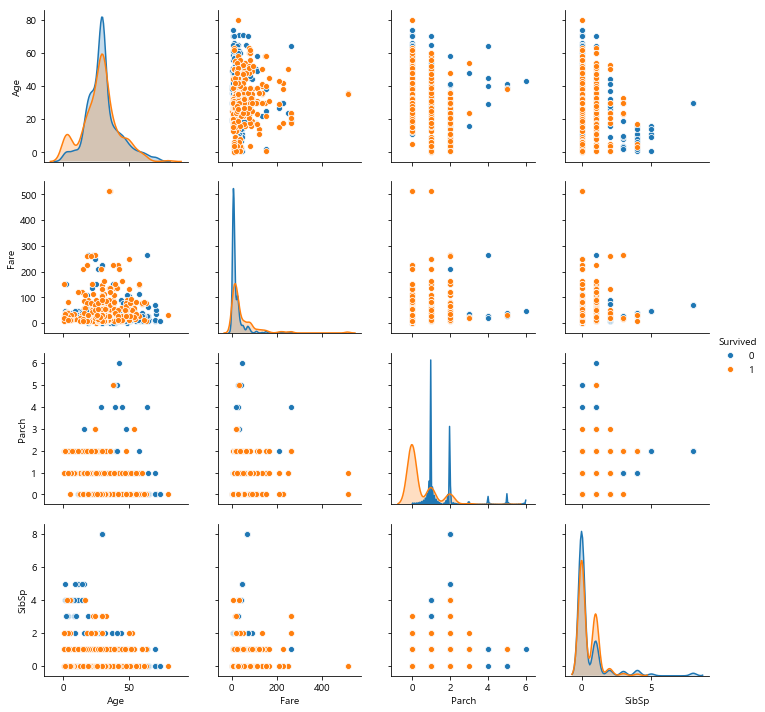

In [72]:
sns.pairplot(titanic[list(numerical_feature) + ["Survived"]], hue="Survived", x_vars=numerical_feature, y_vars=numerical_feature)
plt.show()

In [73]:
trn = pd.read_csv("l_d/p3/ssd_train.csv", na_values=["-1", "-1.0"])
tst = pd.read_csv("l_d/p3/ssd_test.csv", na_values=["-1", "-1.0"])

In [74]:
print(trn.shape)
print(tst.shape)

(595212, 59)
(892816, 58)


In [75]:
trn.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [76]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64

In [77]:
trn.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
trn.isnull().sum(axis=0)

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [79]:
tst.isnull().sum(axis=0)

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [80]:
np.unique(trn["target"])

array([0, 1], dtype=int64)

In [81]:
1.0 * sum(trn["target"]) / trn.shape[0]

0.036447517859182946

In [82]:
tst["target"] = np.nan

In [83]:
df = pd.concat([trn, tst], axis=0)

C:\Users\Affinity\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [84]:
def bar_plot(col, data, hue=None):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, hue=hue, data=data, alpha=0.5)
    plt.show()

def dist_plot(col, data):
    f, ax = plt.subplots(figsize=(10, 5))
    sns.distplot(data[col].dropna(), kde=False, bins=10)
    plt.show()

def bar_plot_ci(col, data):
    f, ax = plt.subplots(figsize=(10,5))
    sns.barplot(x=col, y="target", data=data)
    plt.show()

In [85]:
#list(df)
bin_list = []
cat_list = []
integer_list = []
float_list = []

for column in list(df):
    if "bin" in column:
        bin_list.append(column)
    if "cat" in column:
        cat_list.append(column)
bin_list, cat_list

(['ps_calc_15_bin',
  'ps_calc_16_bin',
  'ps_calc_17_bin',
  'ps_calc_18_bin',
  'ps_calc_19_bin',
  'ps_calc_20_bin',
  'ps_ind_06_bin',
  'ps_ind_07_bin',
  'ps_ind_08_bin',
  'ps_ind_09_bin',
  'ps_ind_10_bin',
  'ps_ind_11_bin',
  'ps_ind_12_bin',
  'ps_ind_13_bin',
  'ps_ind_16_bin',
  'ps_ind_17_bin',
  'ps_ind_18_bin'],
 ['ps_car_01_cat',
  'ps_car_02_cat',
  'ps_car_03_cat',
  'ps_car_04_cat',
  'ps_car_05_cat',
  'ps_car_06_cat',
  'ps_car_07_cat',
  'ps_car_08_cat',
  'ps_car_09_cat',
  'ps_car_10_cat',
  'ps_car_11_cat',
  'ps_ind_02_cat',
  'ps_ind_04_cat',
  'ps_ind_05_cat'])

In [86]:
binary = ["ps_ind_06_bin", "ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin",
         "ps_ind_10_bin", "ps_ind_11_bin", "ps_ind_12_bin", "ps_ind_13_bin",
         "ps_ind_16_bin", "ps_ind_17_bin", "ps_ind_18_bin", "ps_calc_15_bin",
         "ps_calc_16_bin", "ps_calc_17_bin", "ps_calc_18_bin", "ps_calc_15_bin",
         "ps_calc_20_bin"]
category = ["ps_ind_02_cat", "ps_ind_04_cat", "ps_ind_05_cat", "ps_car_01_cat",
           "ps_car_02_cat", "ps_car_03_cat", "ps_car_04_cat", "ps_car_05_cat",
           "ps_car_06_cat", "ps_car_07_cat", "ps_car_08_cat", "ps_car_09_cat",
           "ps_car_10_cat", "ps_car_11_cat"]
integer = ["ps_ind_01", "ps_ind_03", "ps_ind_14", "ps_ind_15", "ps_calc_04",
          "ps_calc_05", "ps_calc_06", "ps_calc_07", "ps_calc_08", "ps_calc_09",
          "ps_calc_10", "ps_calc_11", "ps_calc_12", "ps_calc_13", "ps_calc_14",
          "ps_car_11"]
floats = ["ps_reg_01", "ps_reg_02", "ps_reg_03", "ps_calc_01", "ps_calc_02",
         "ps_calc_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]


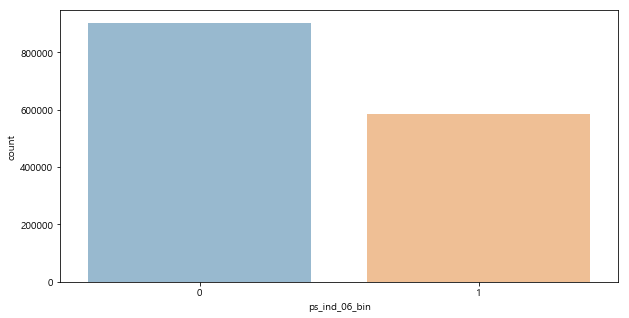

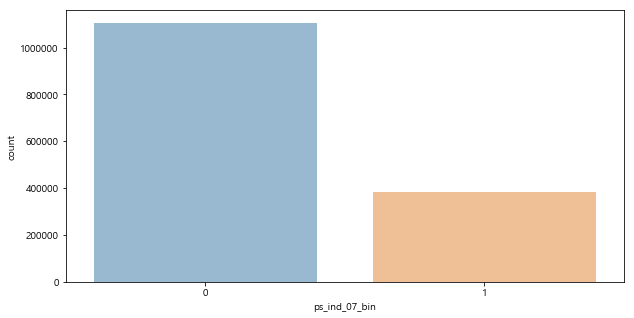

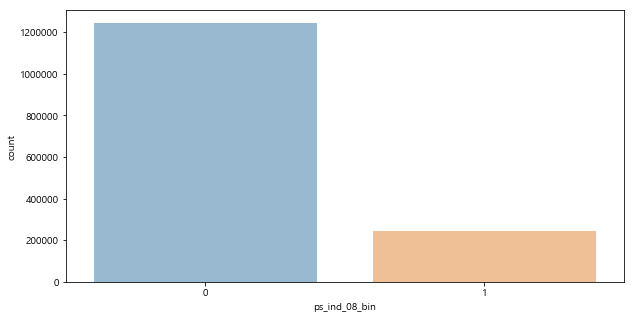

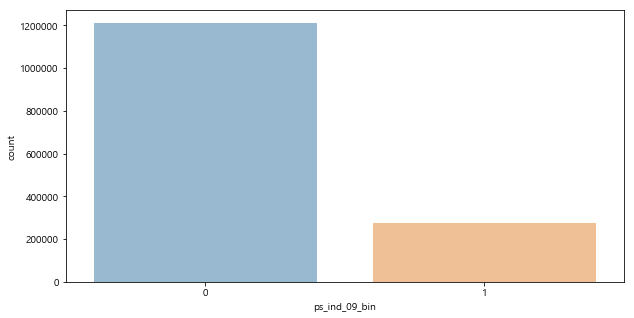

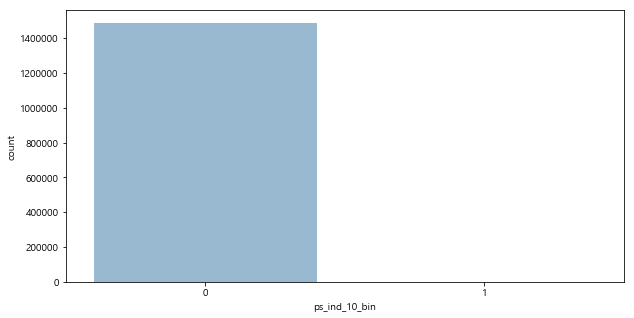

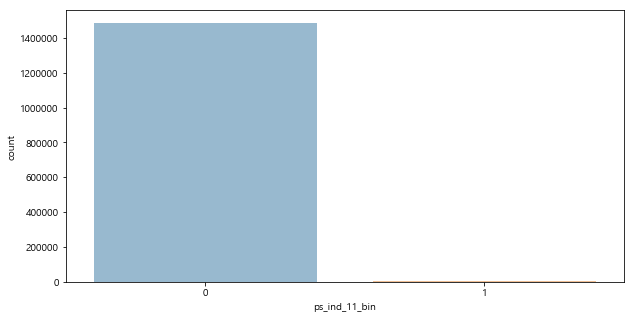

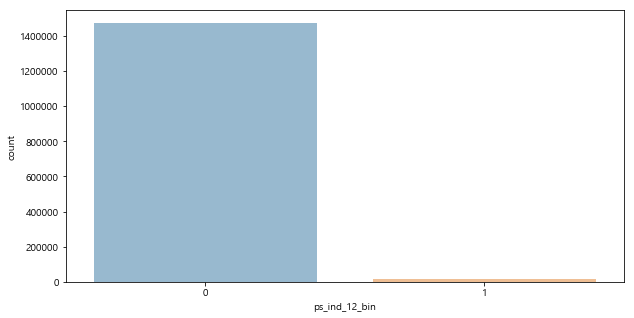

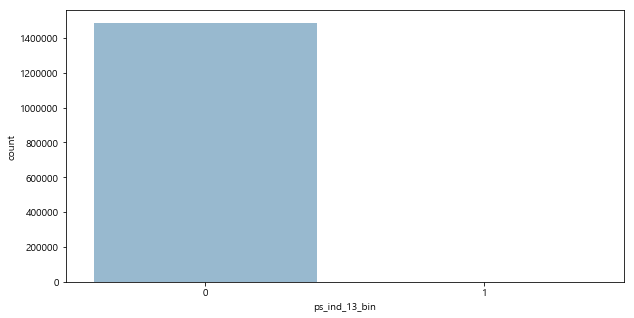

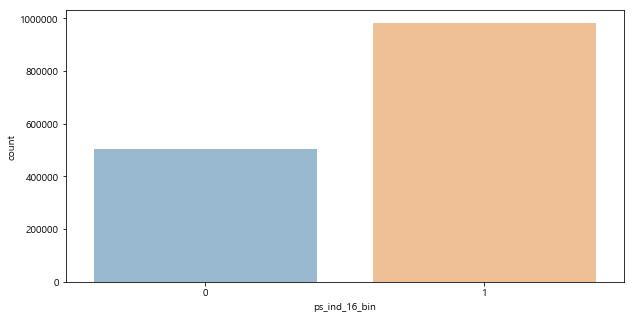

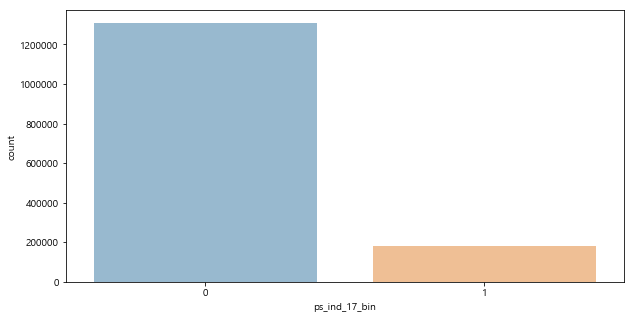

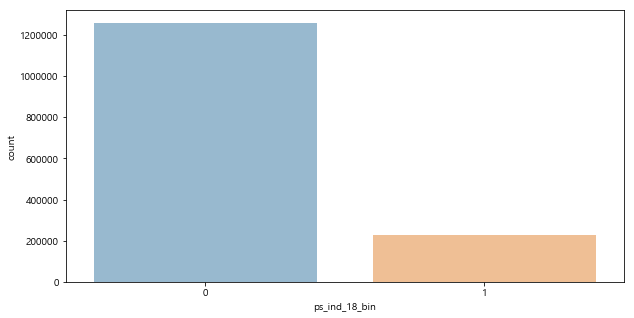

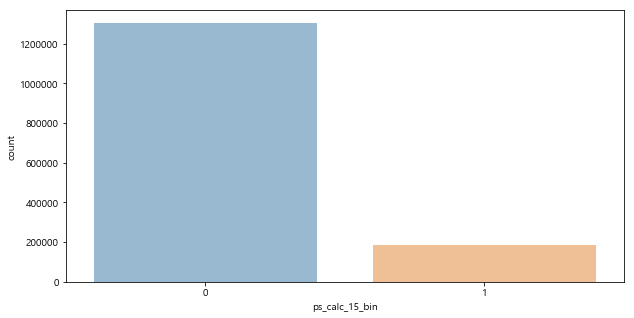

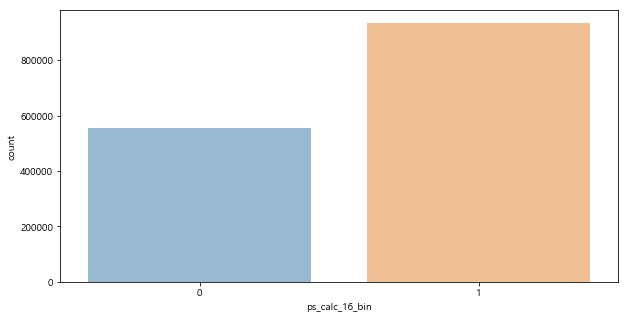

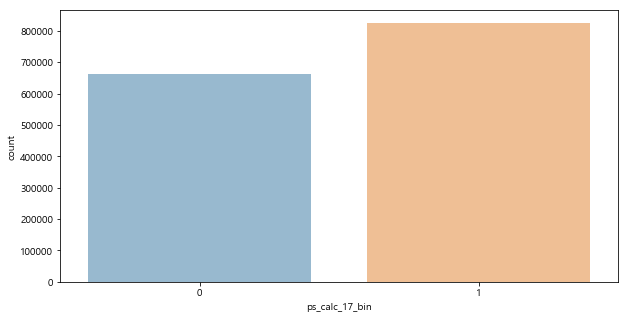

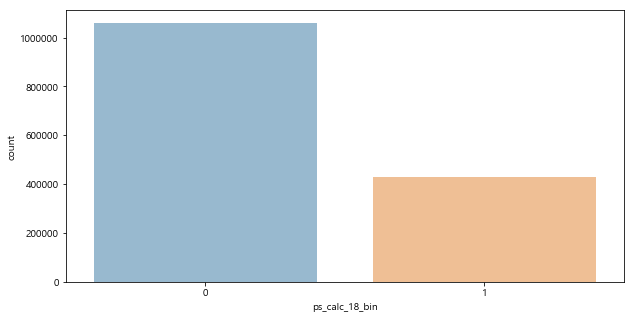

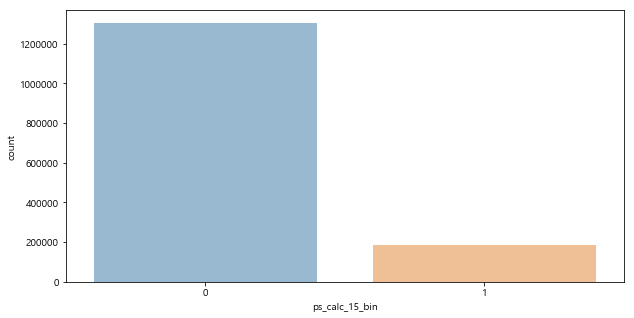

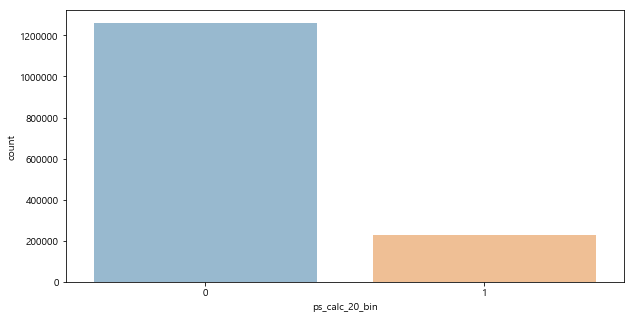

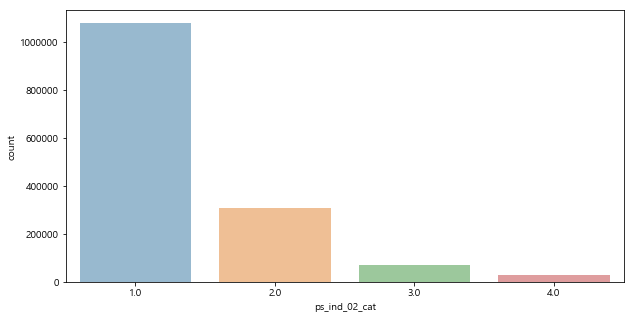

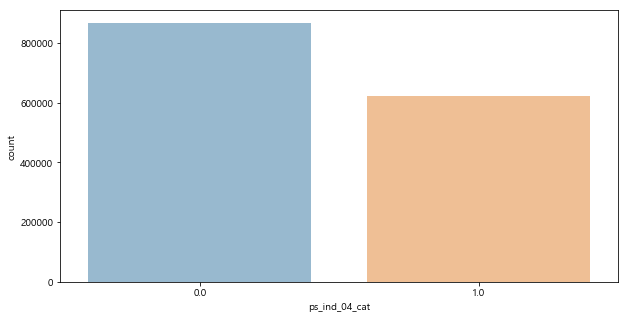

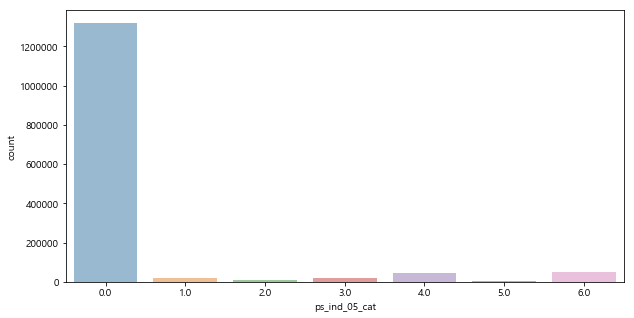

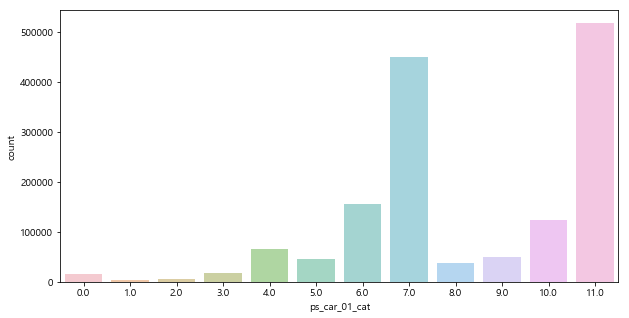

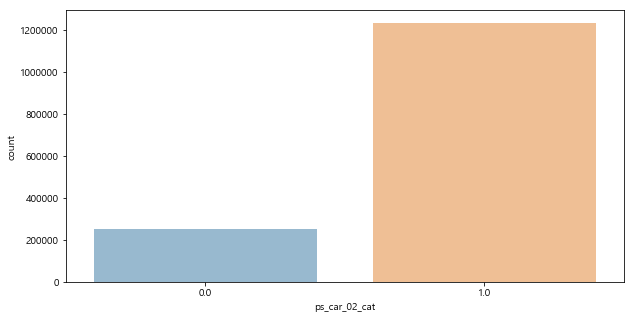

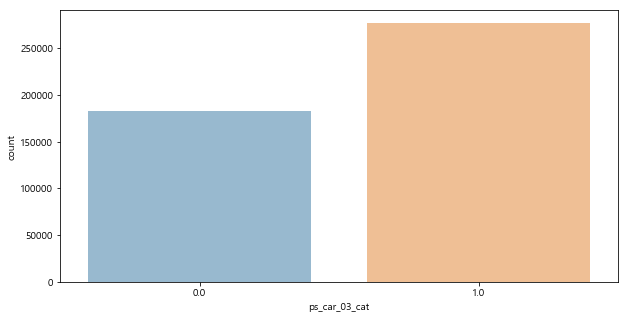

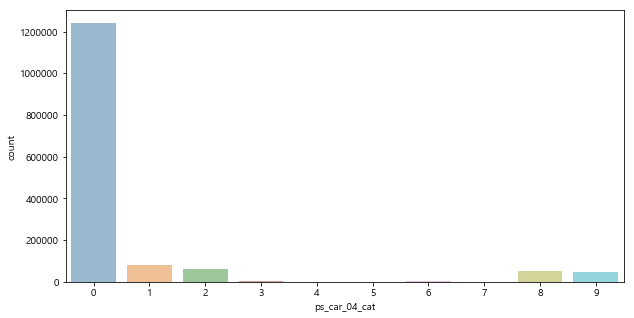

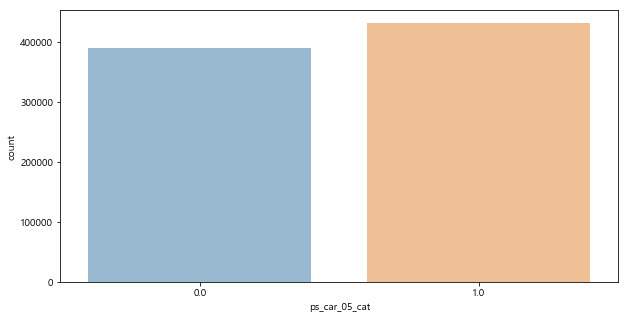

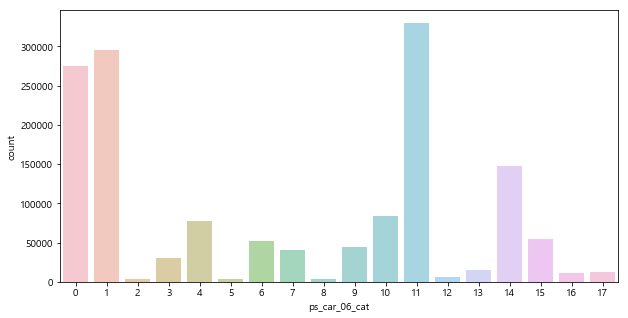

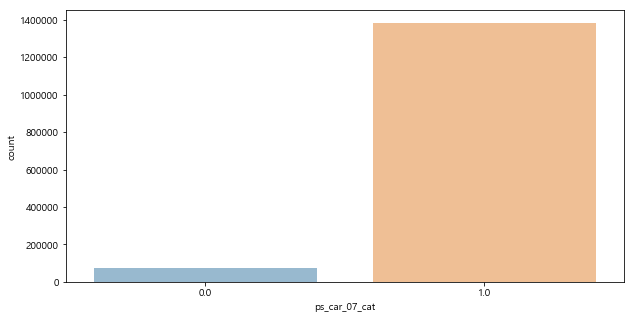

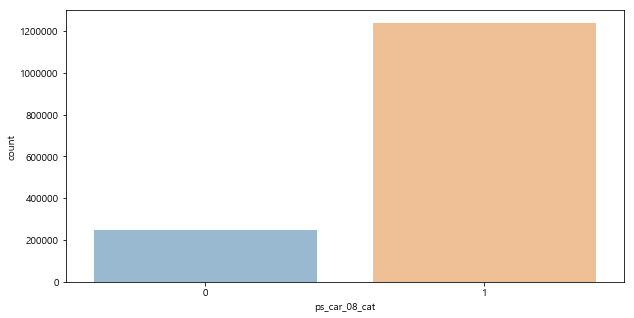

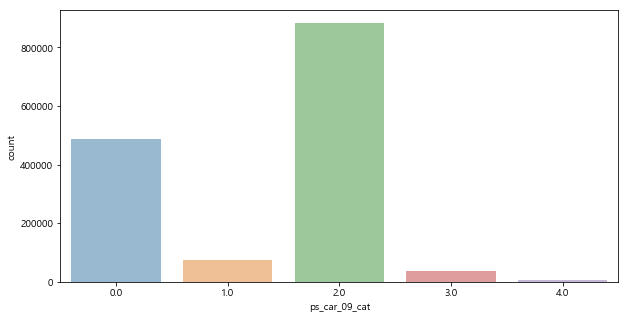

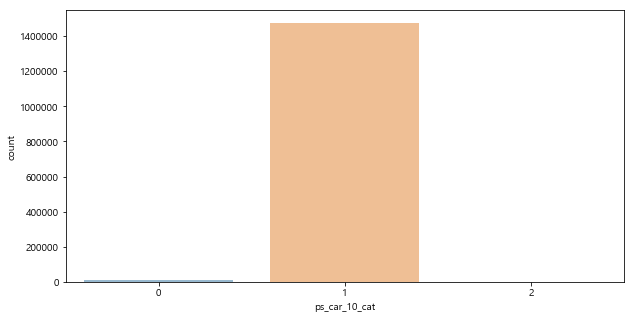

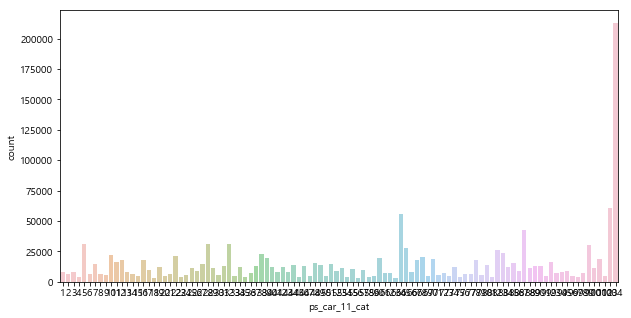

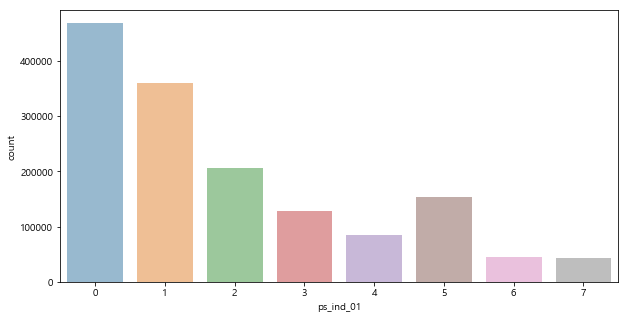

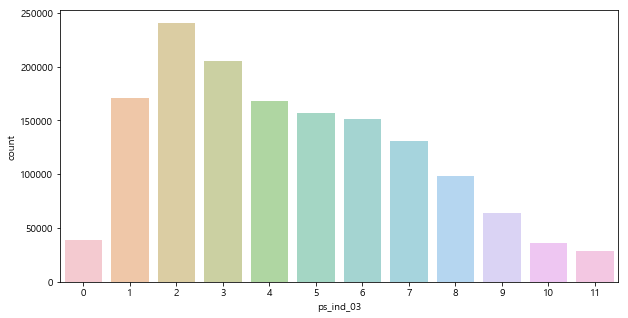

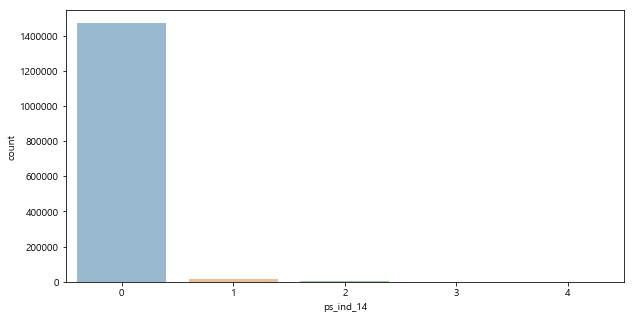

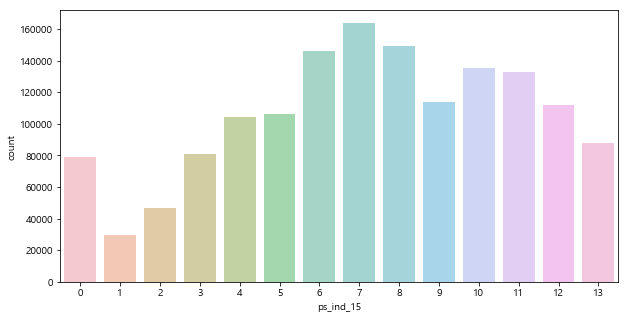

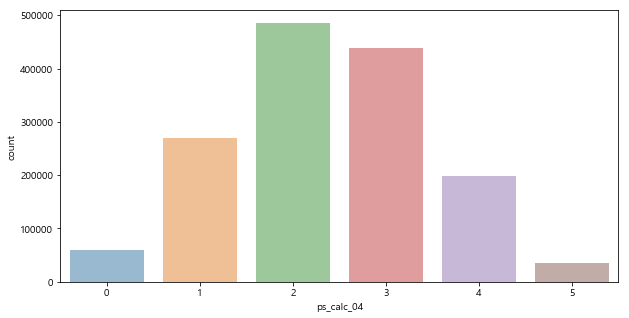

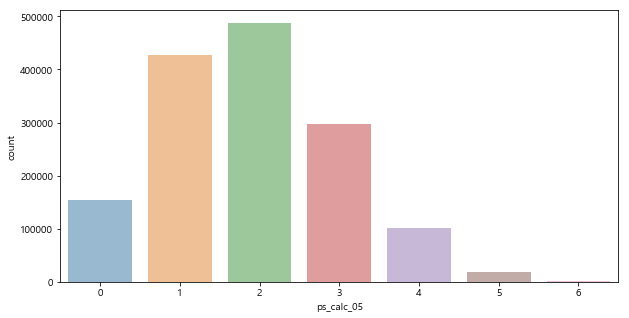

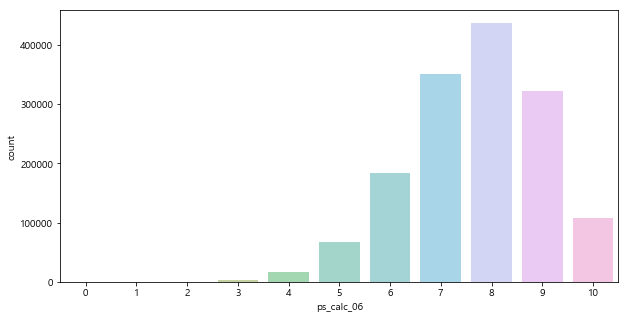

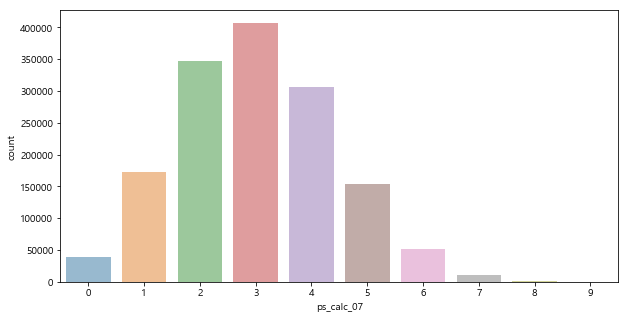

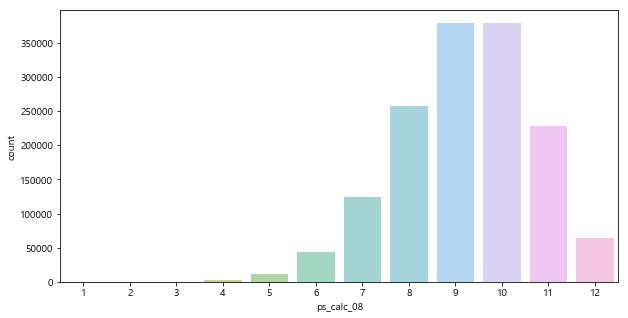

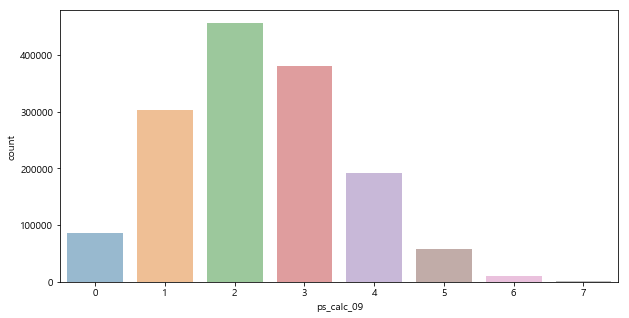

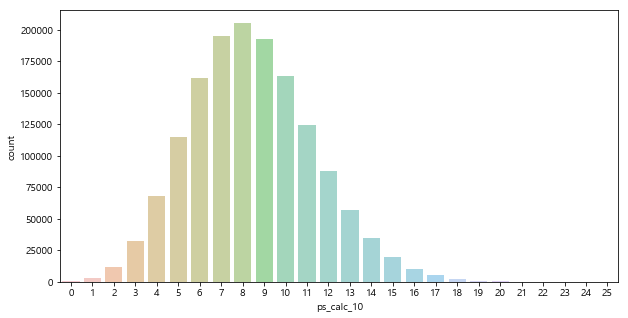

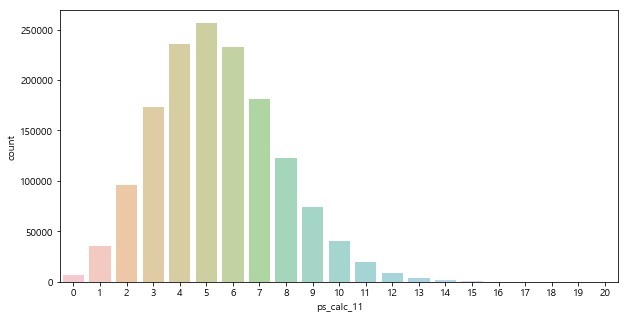

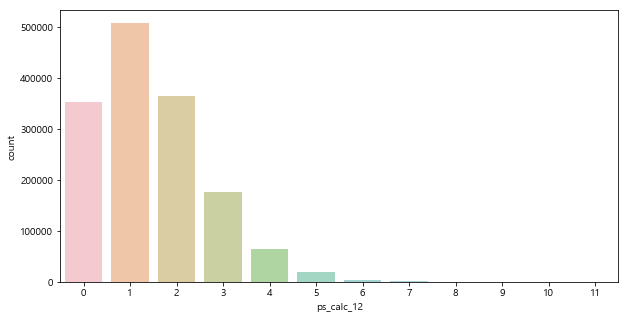

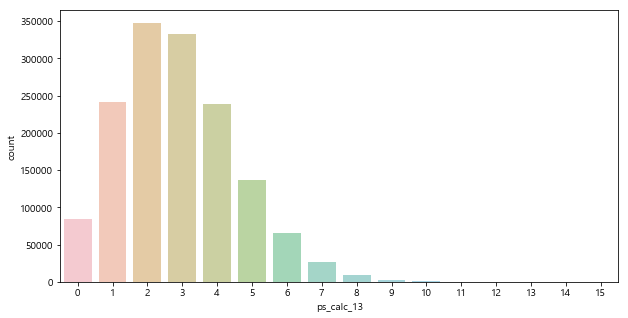

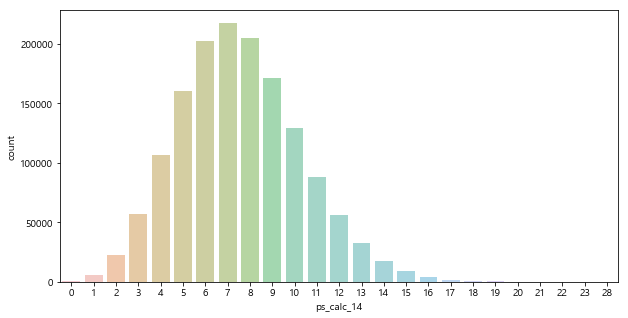

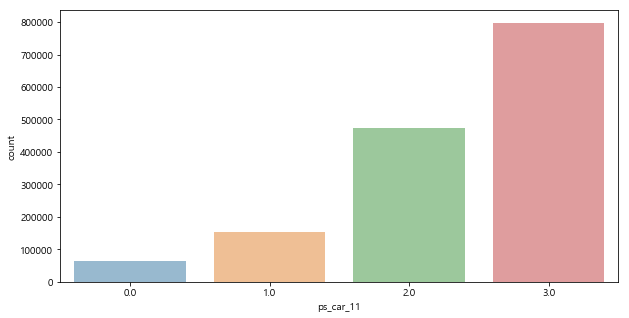

In [87]:
for col in binary + category + integer:
    bar_plot(col, df)

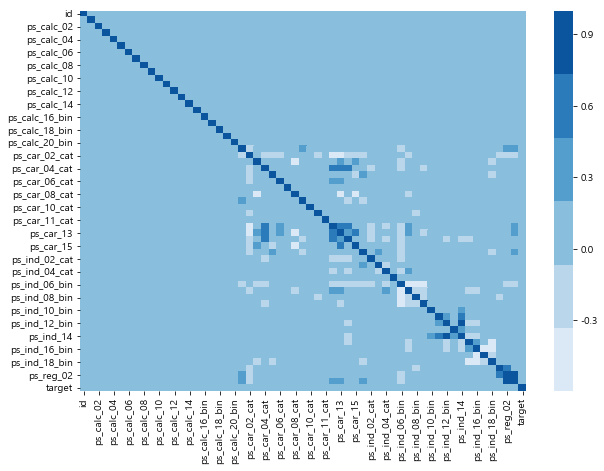

In [92]:
corr = df.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, cmap=cmap)

In [93]:
features = ["ps_ind_06_bin", "ps_ind_07_bin", "ps_ind_08_bin", "ps_ind_09_bin",
           "ps_ind_10_bin", "ps_ind_11_bin", "ps_ind_12_bin", "ps_ind_13_bin",
           "ps_ind_02_cat", "ps_ind_04_cat", "ps_ind_05_cat", "ps_car_01_cat",
           "ps_car_02_cat", "ps_car_03_cat", "ps_car_04_cat", "ps_car_05_cat",
           "ps_ind_01", "ps_ind_03", "ps_ind_14", "ps_ind_15", "ps_calc_04",
           "ps_calc_05", "ps_calc_06", "ps_calc_07", "ps_calc_08", "ps_calc_09",
           "ps_reg_01", "ps_reg_02", "ps_reg_03", "ps_calc_01", "ps_calc_02",
           "ps_calc_03", "ps_car_12", "ps_car_13", "ps_car_14", "ps_car_15"]

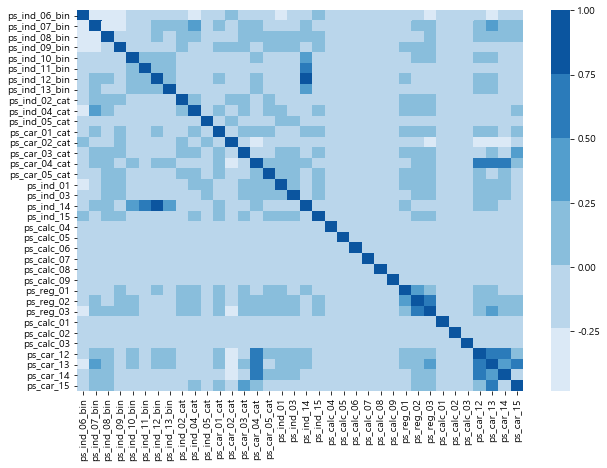

In [94]:
corr_sub = df[features].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_sub, cmap=cmap)

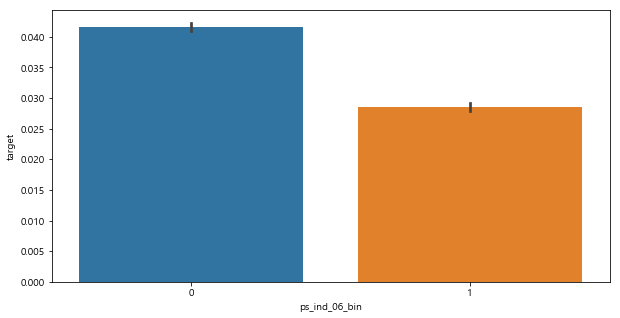

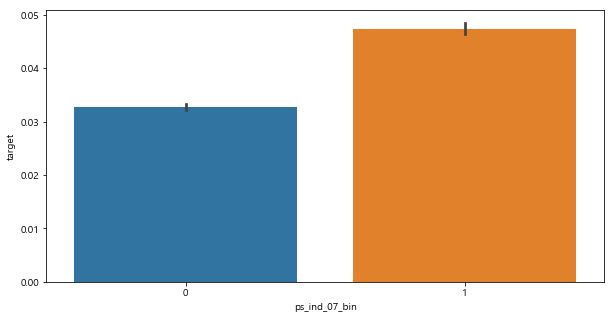

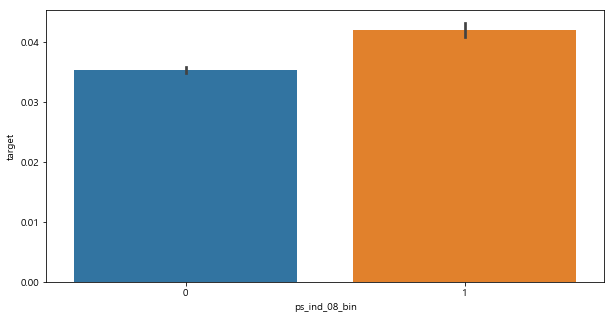

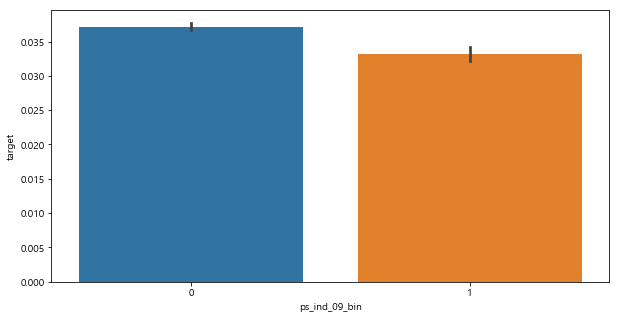

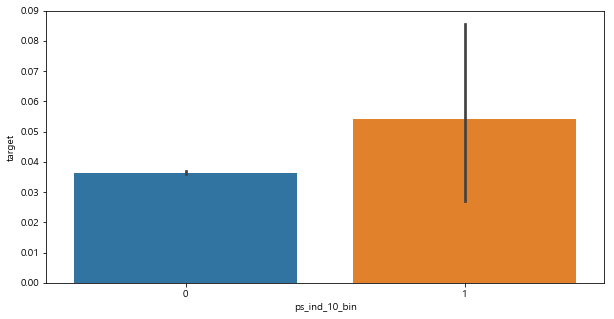

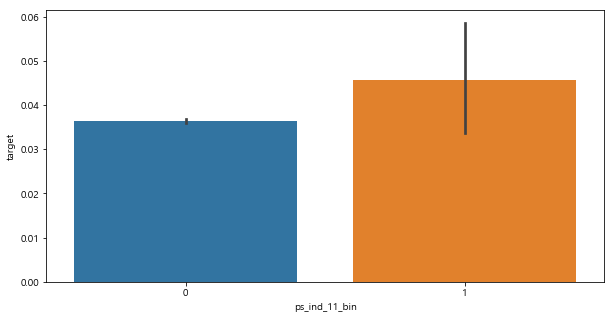

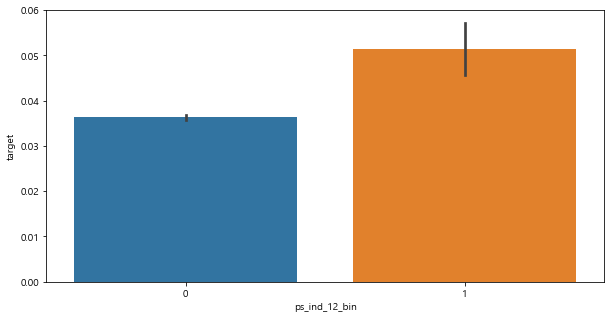

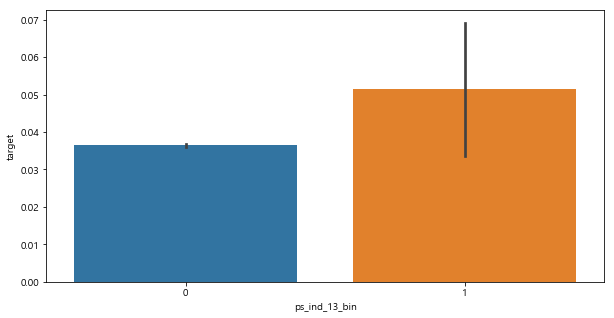

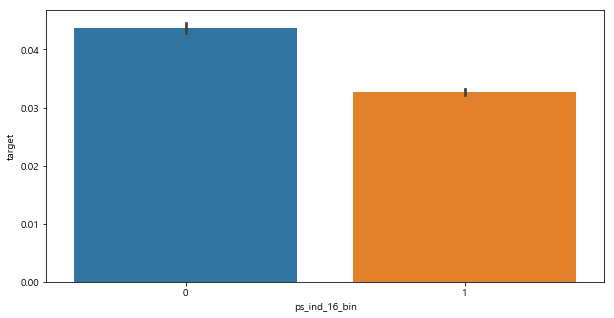

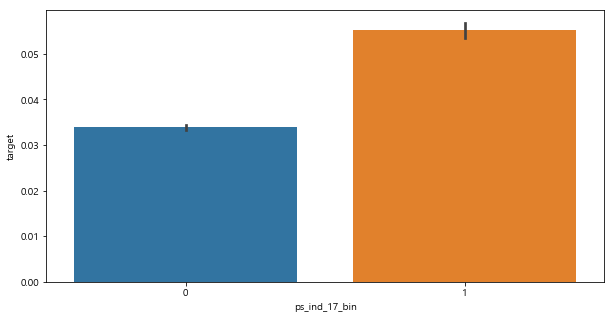

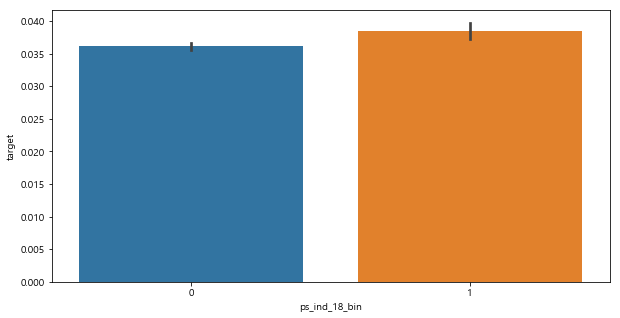

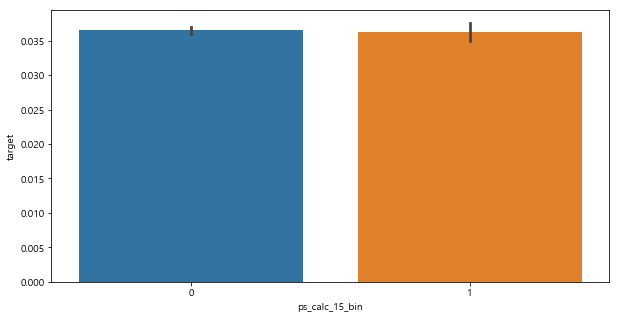

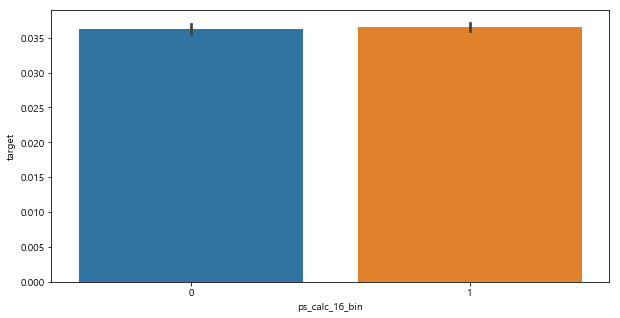

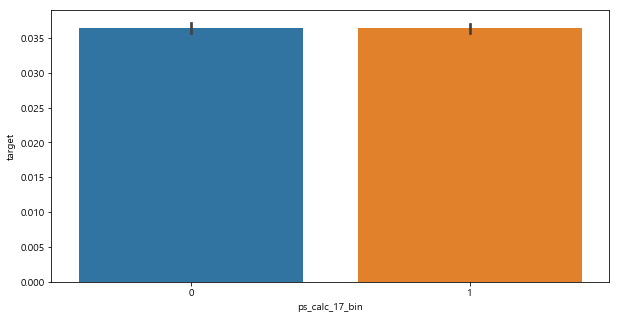

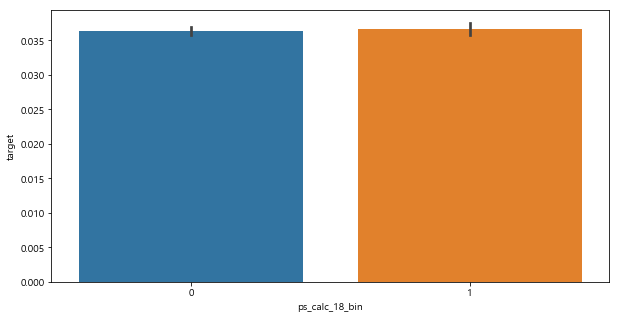

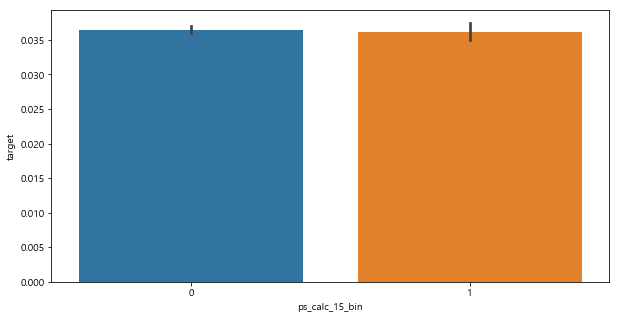

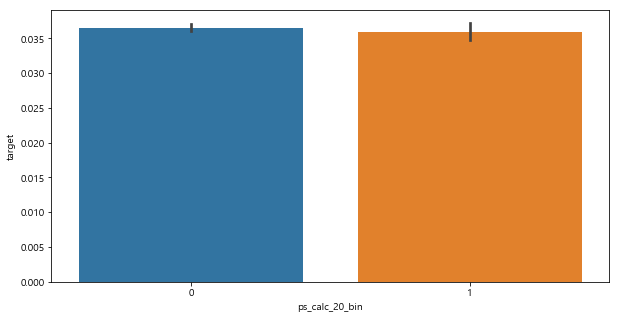

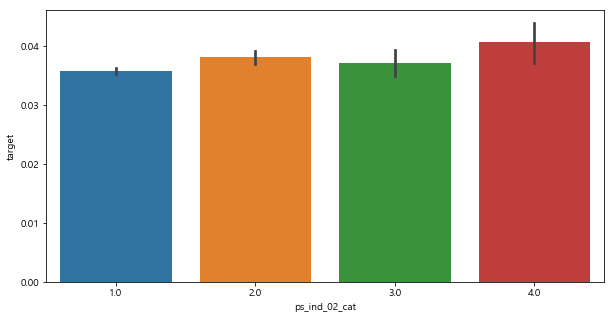

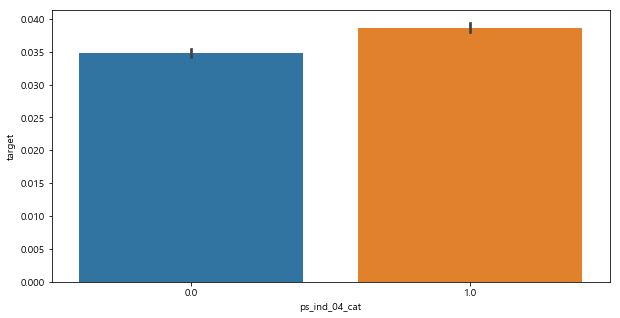

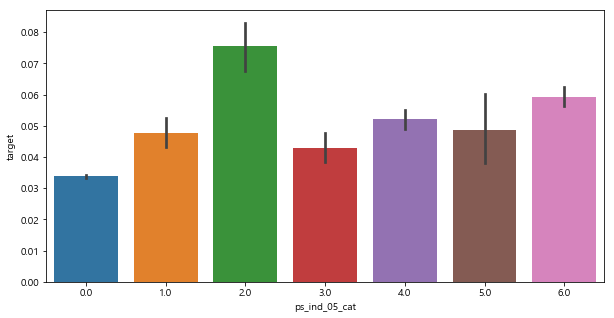

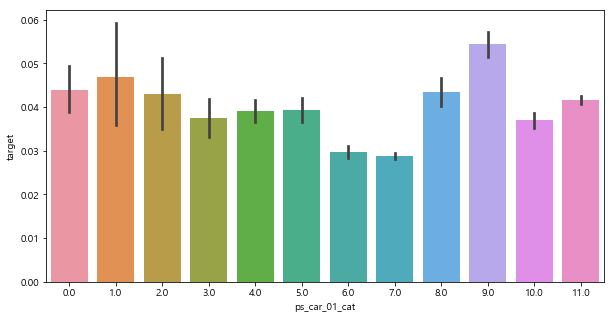

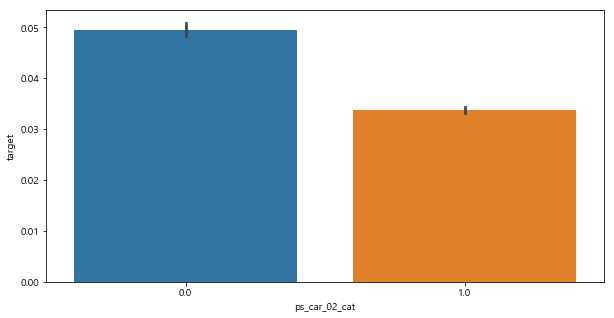

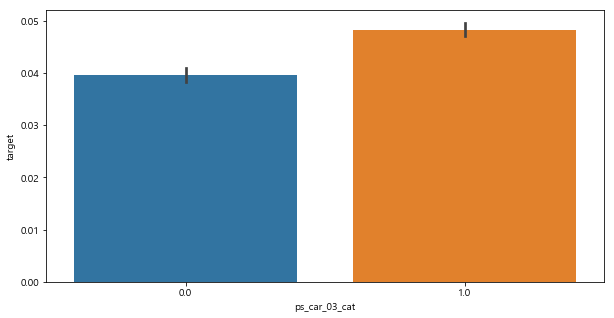

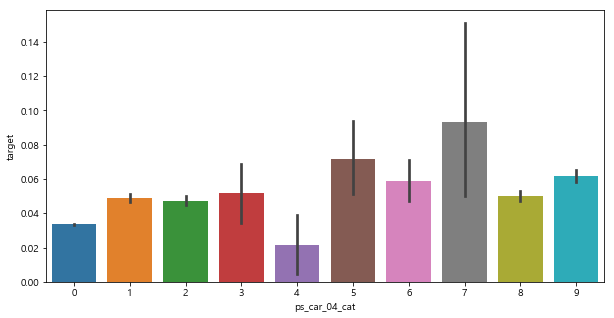

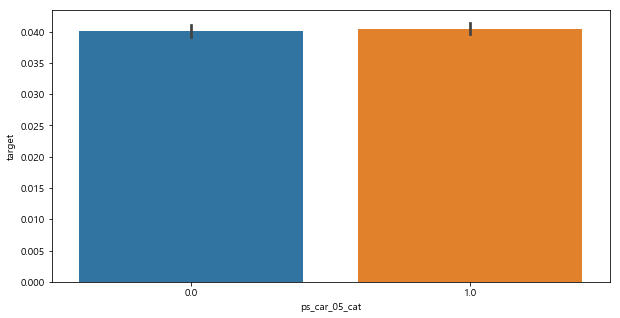

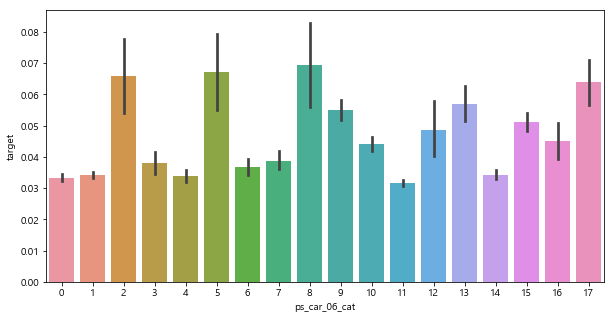

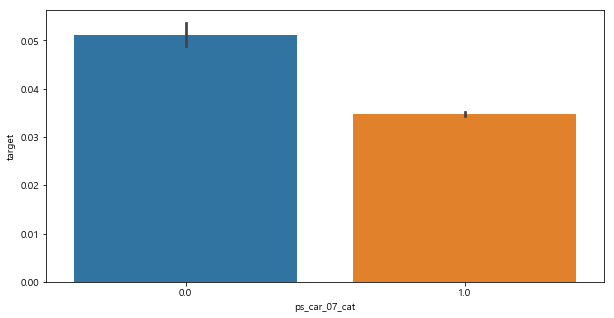

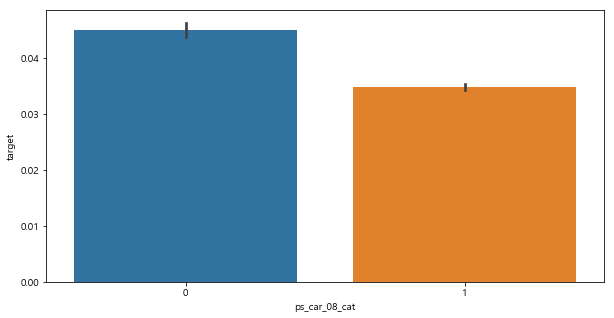

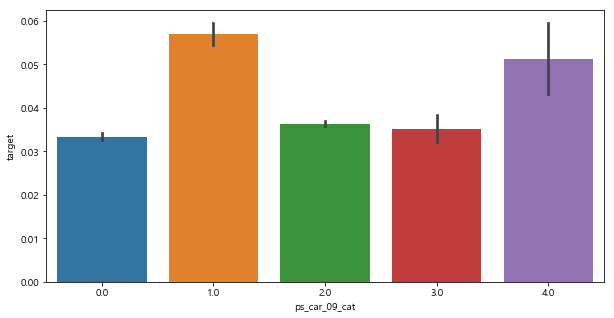

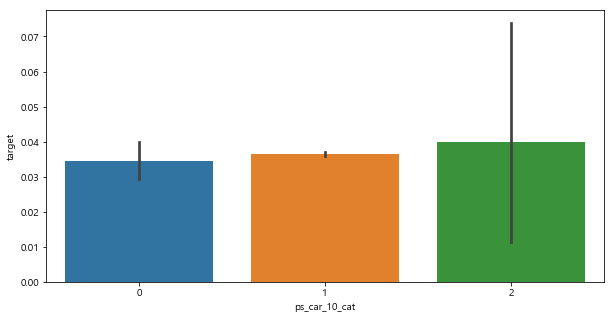

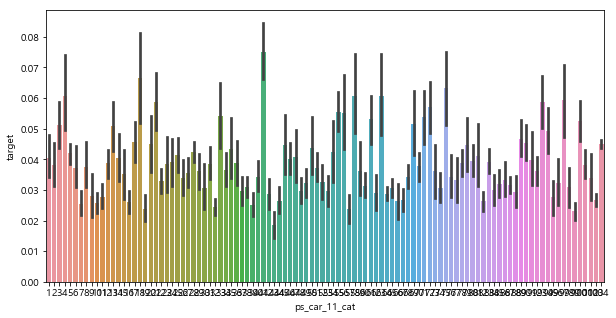

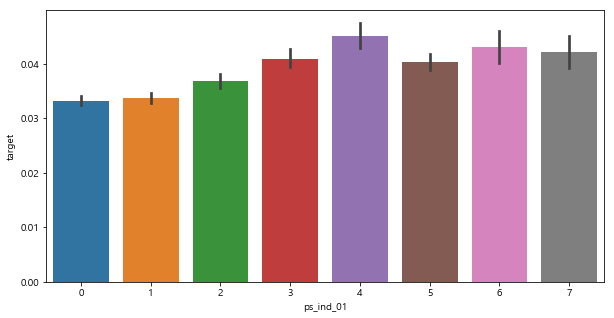

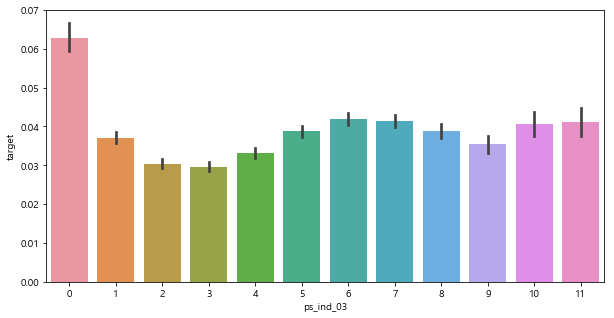

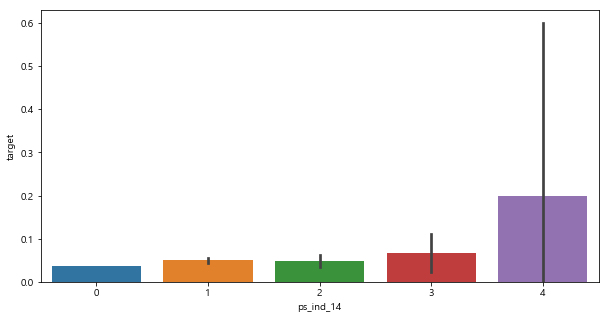

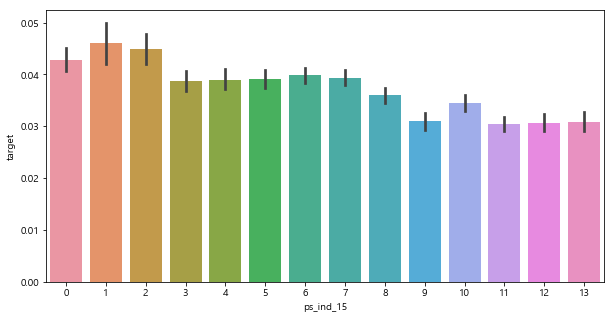

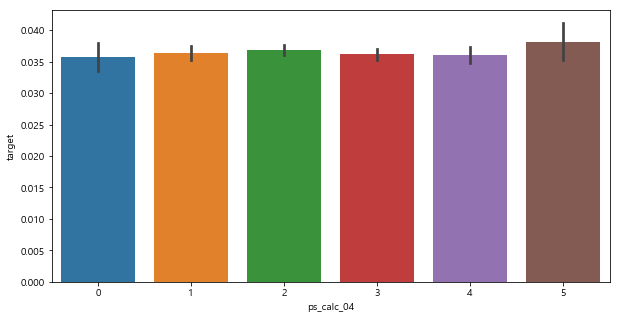

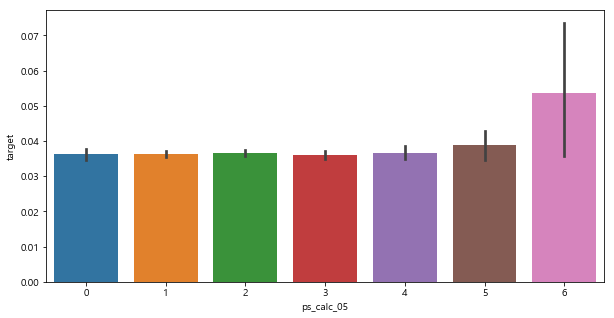

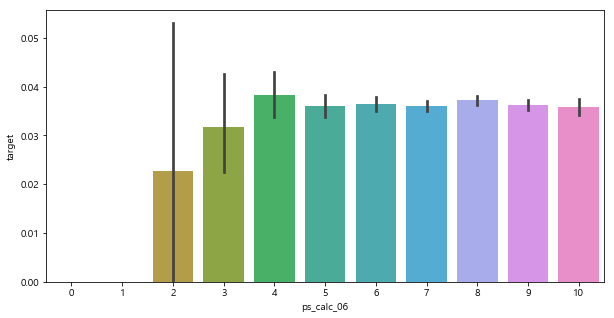

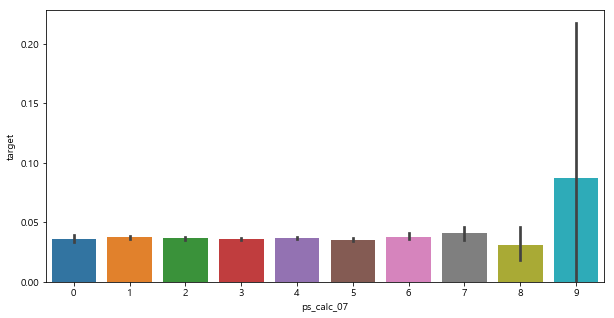

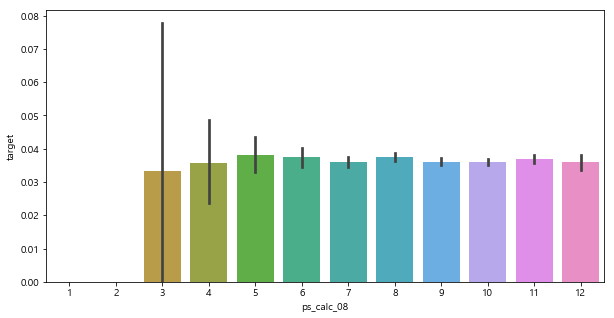

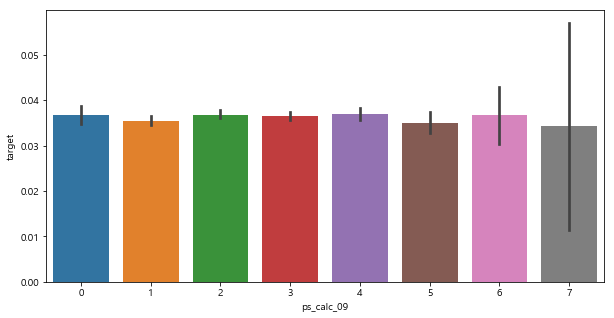

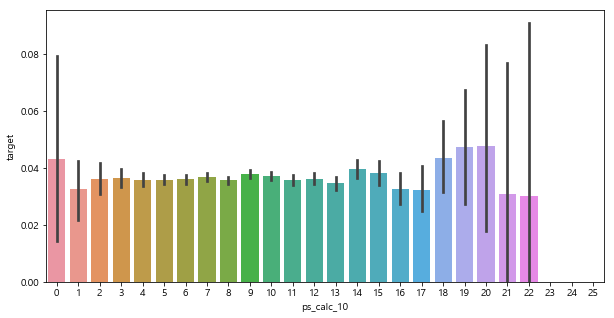

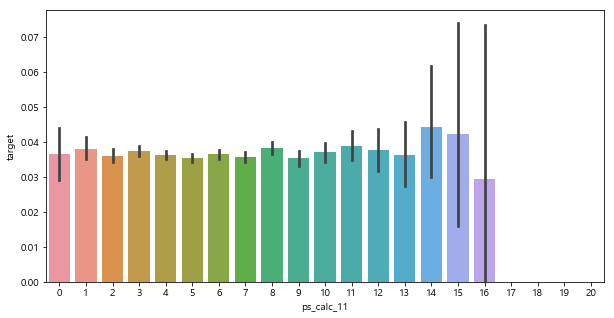

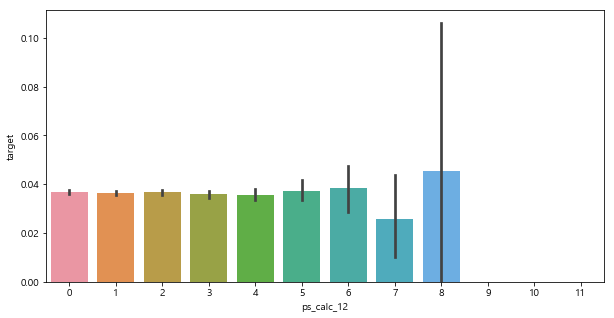

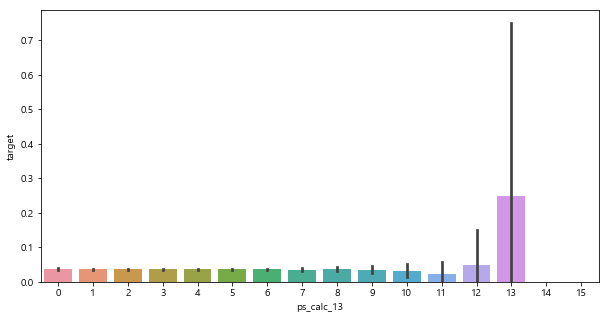

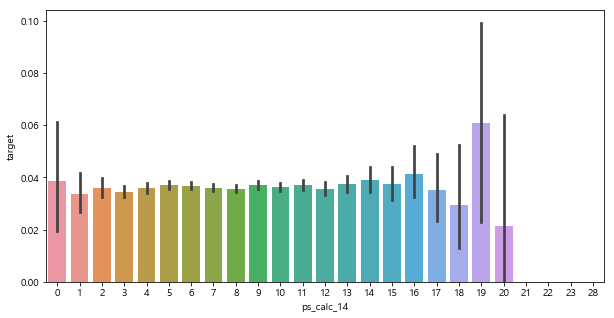

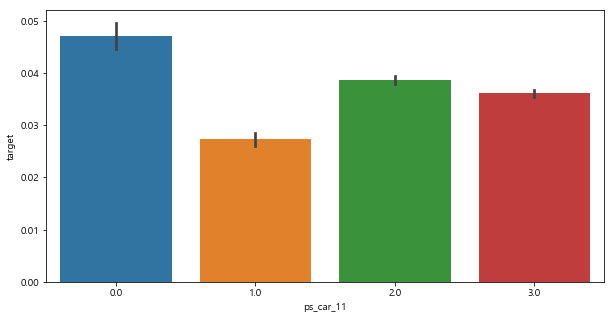

In [97]:
for col in (binary + category + integer):
    bar_plot_ci(col, df)

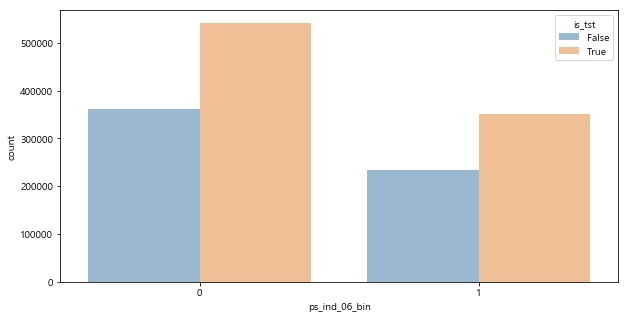

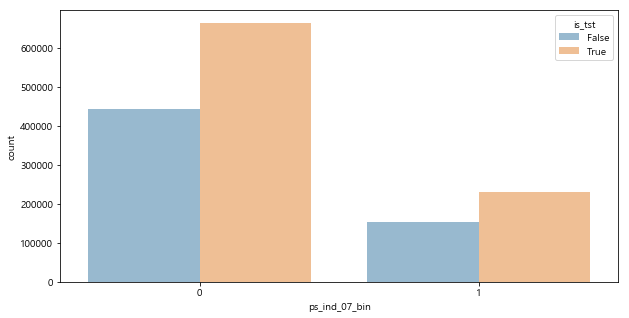

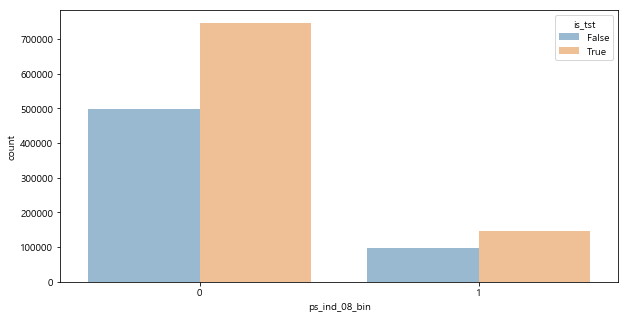

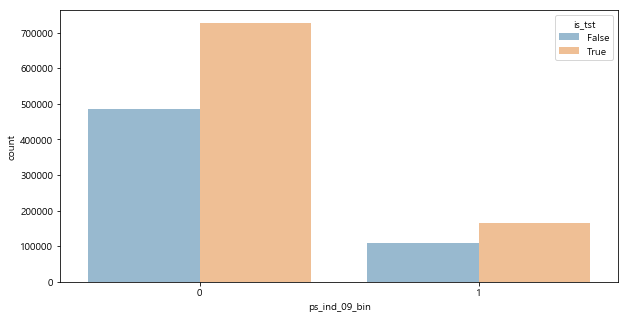

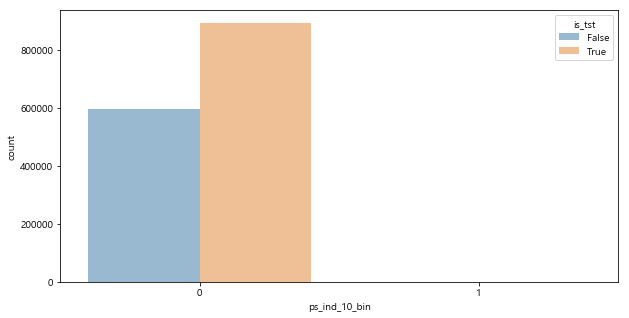

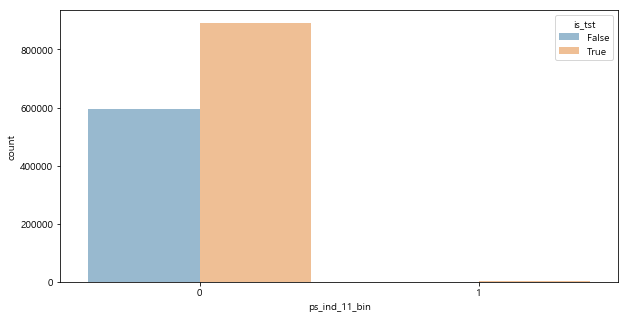

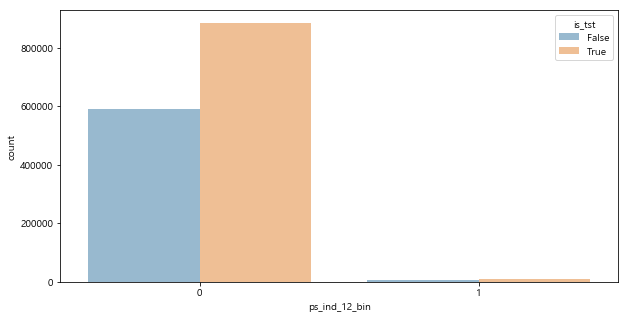

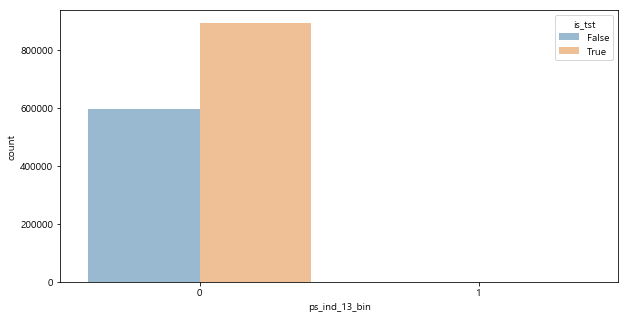

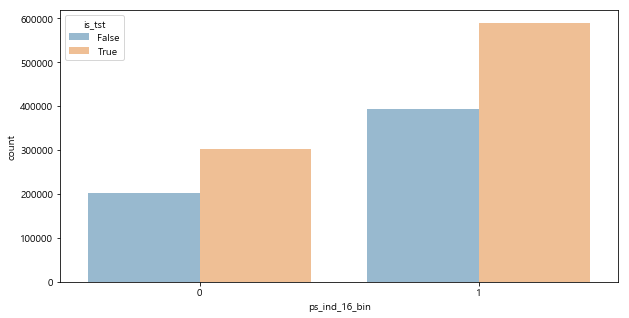

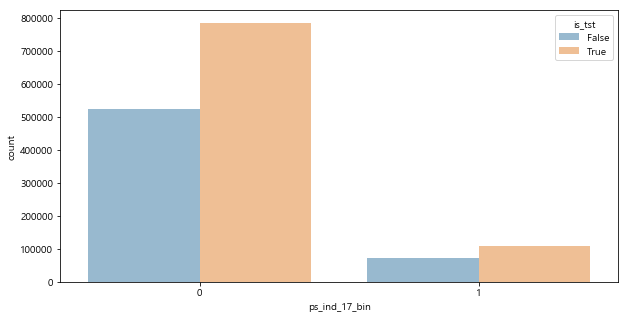

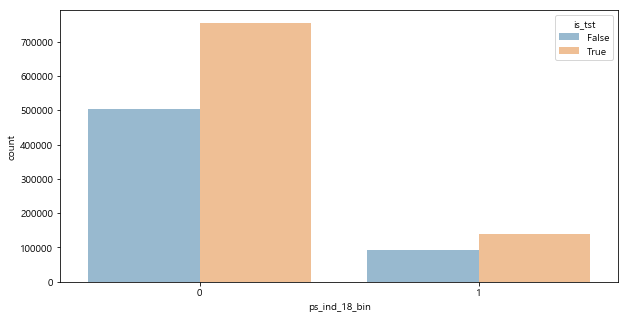

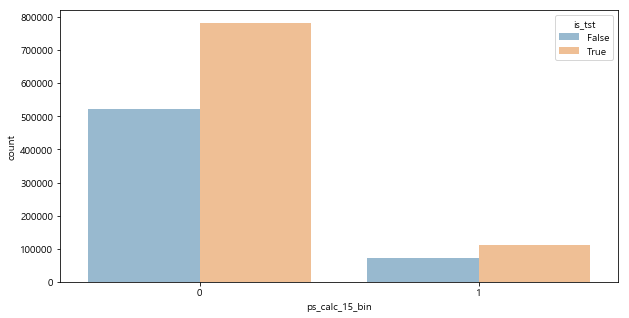

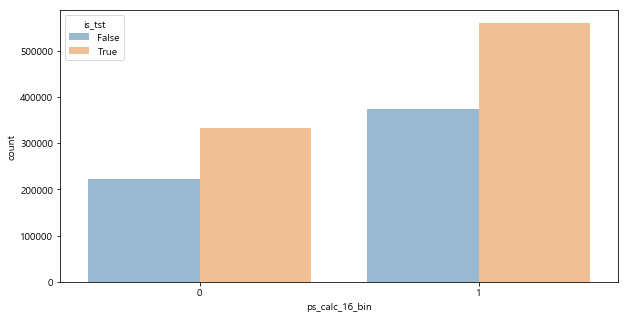

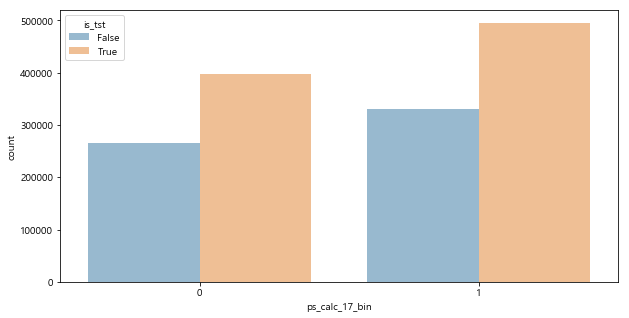

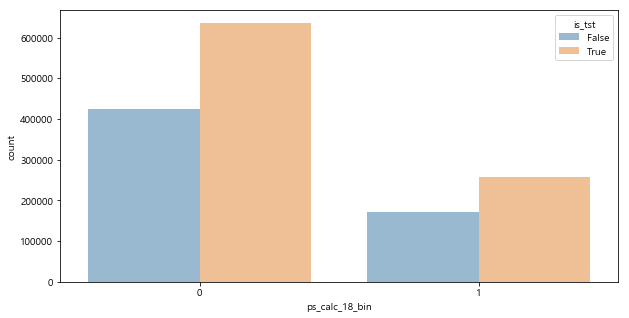

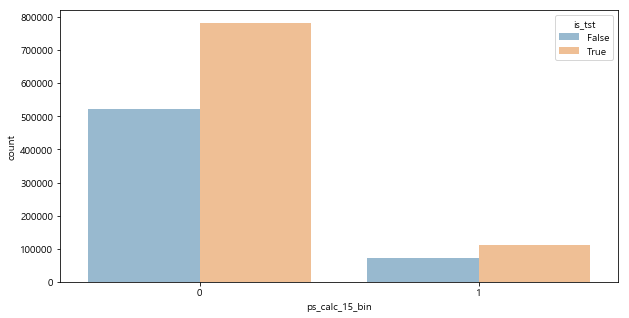

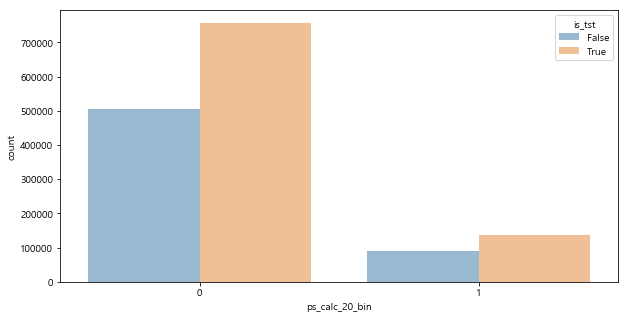

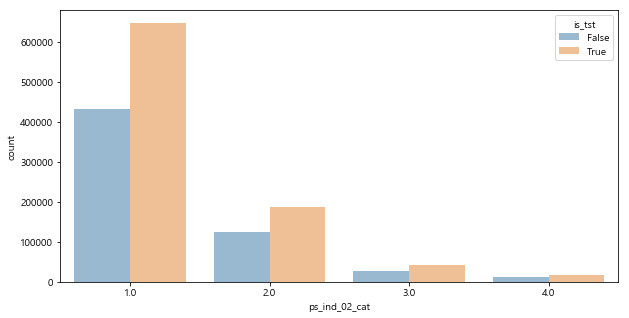

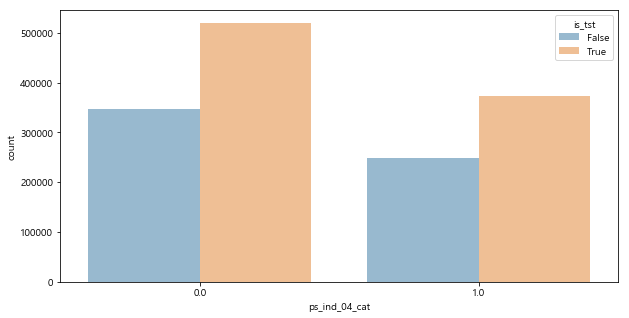

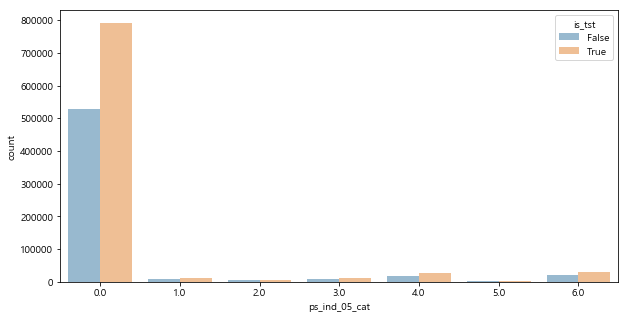

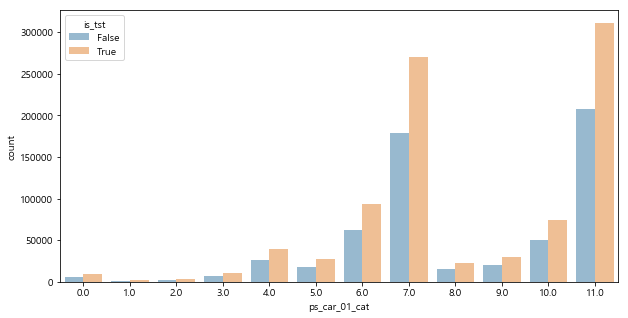

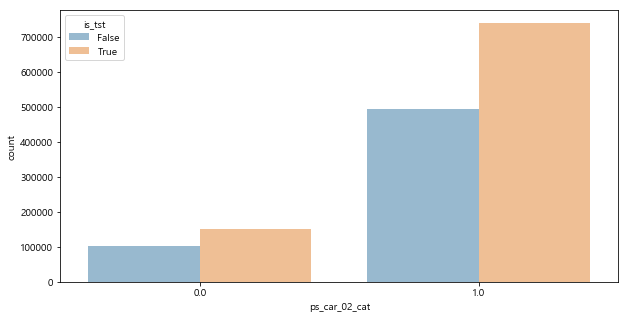

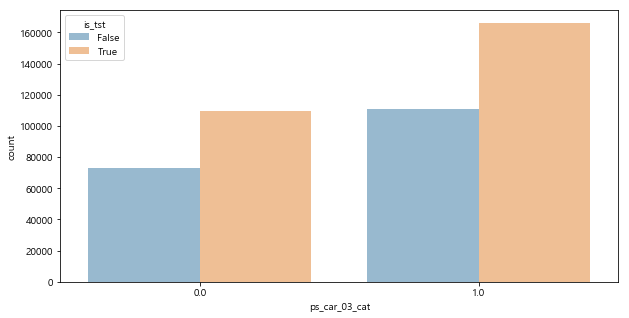

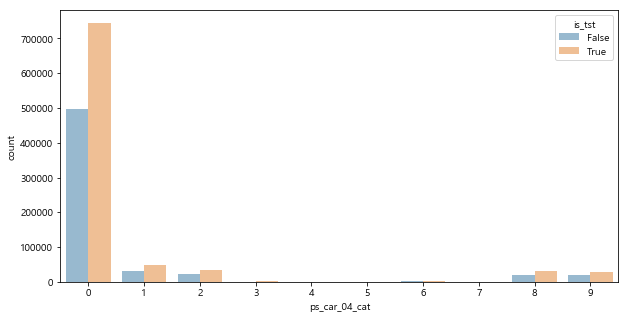

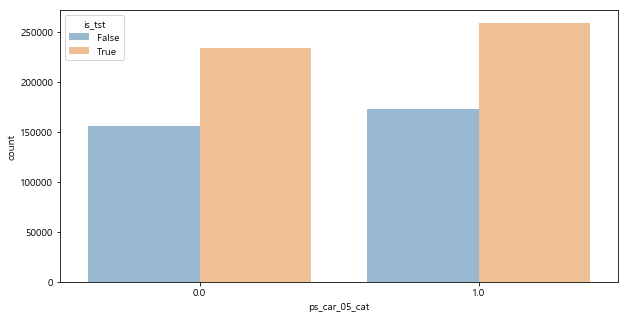

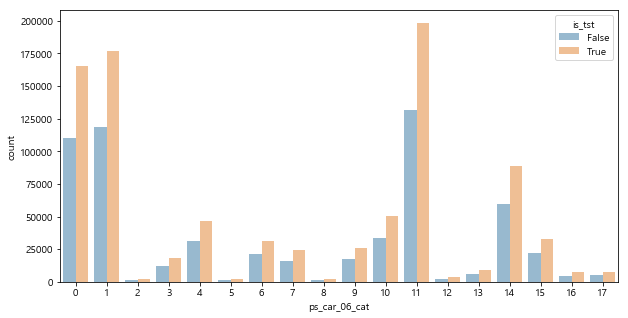

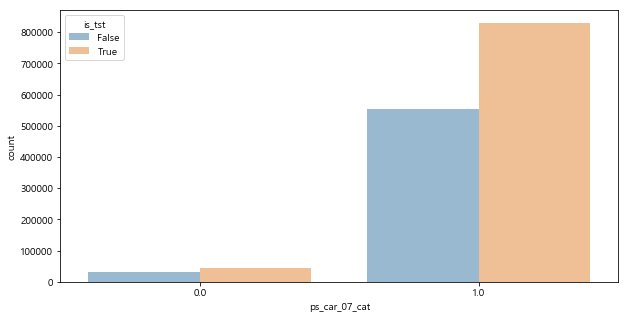

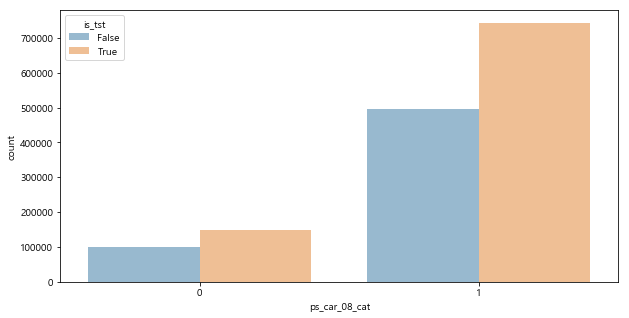

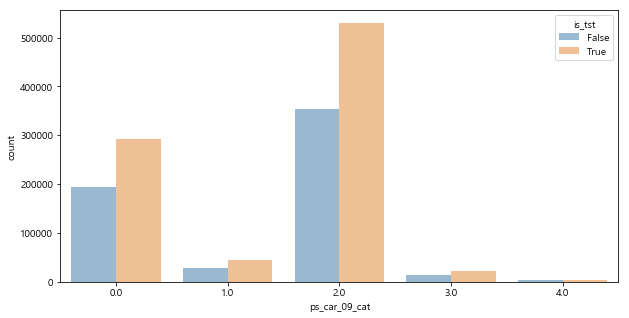

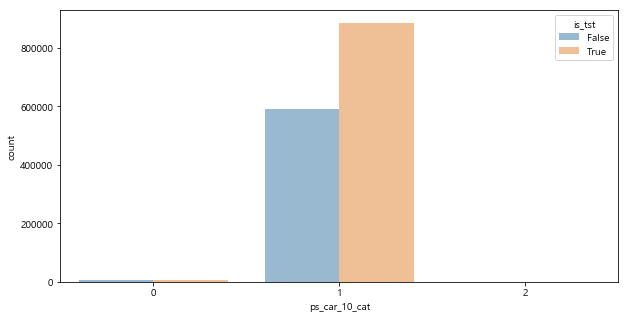

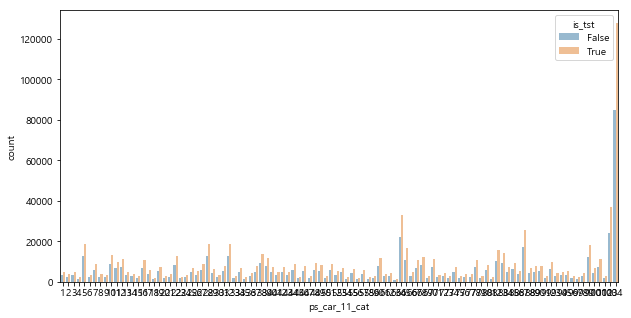

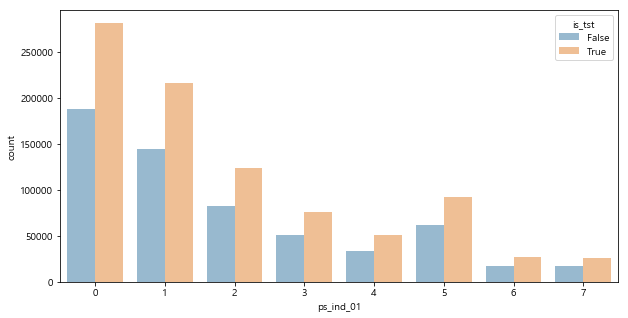

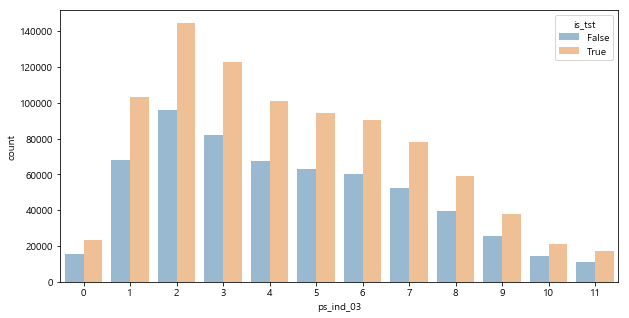

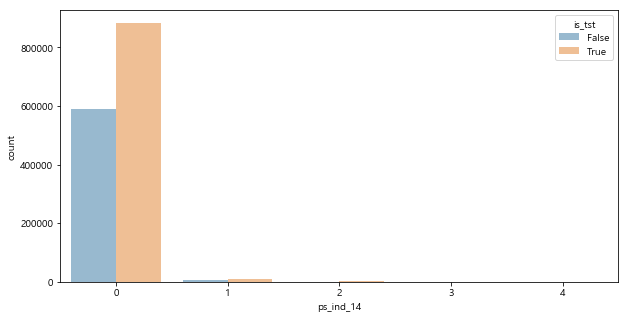

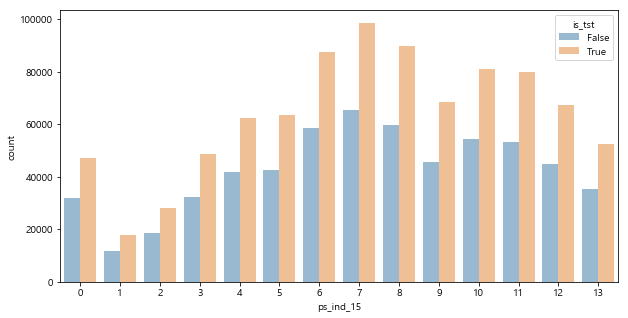

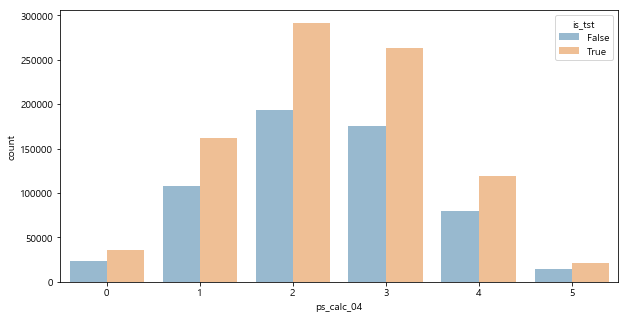

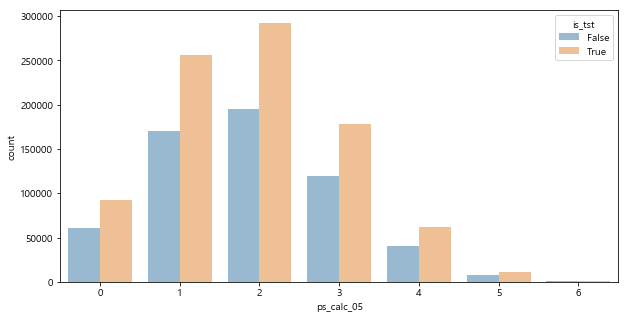

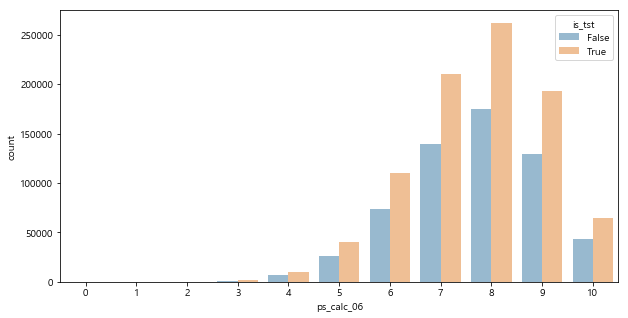

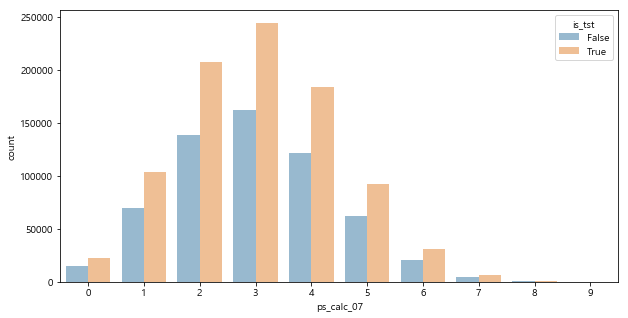

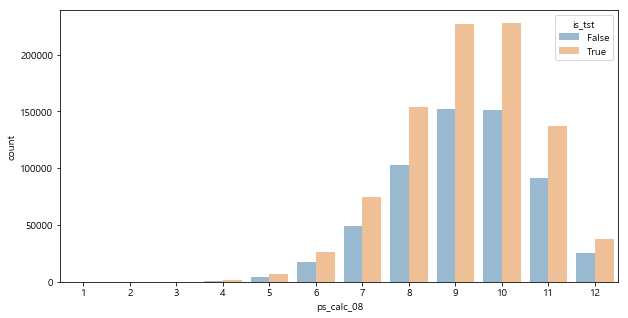

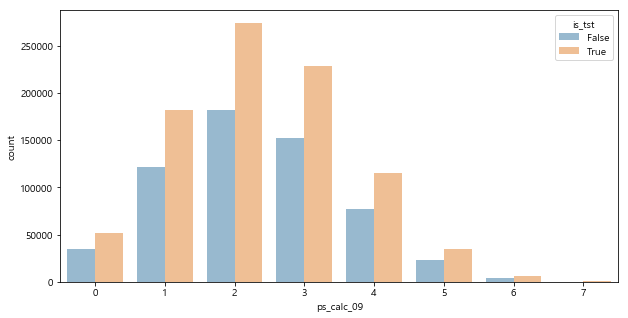

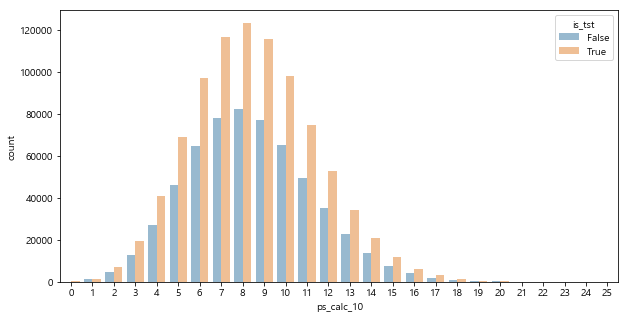

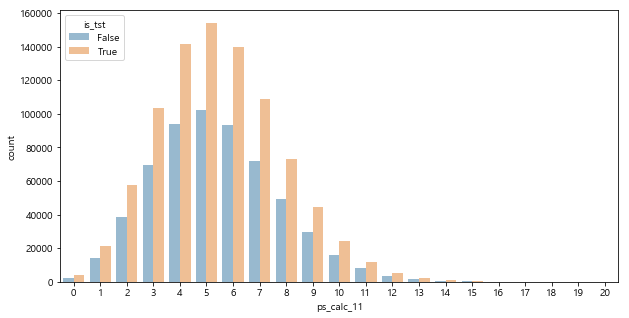

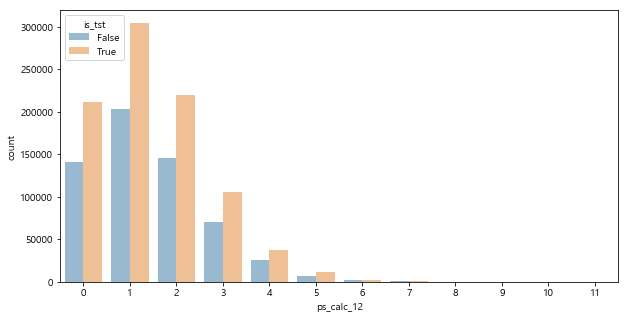

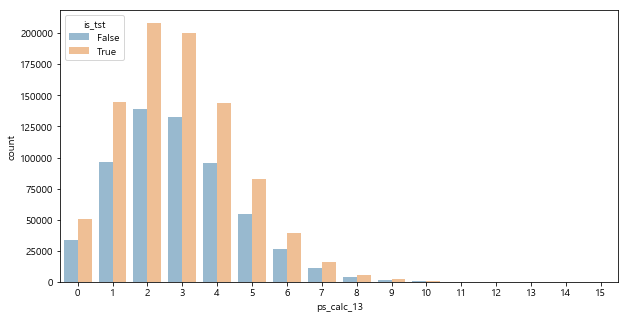

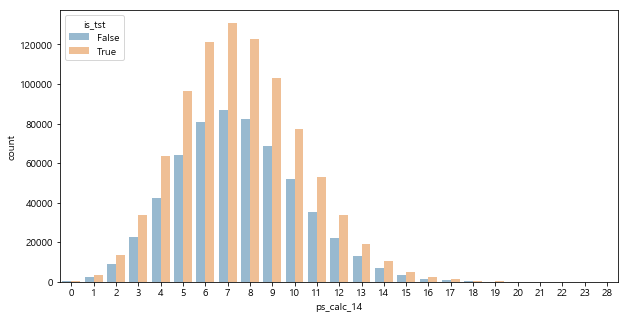

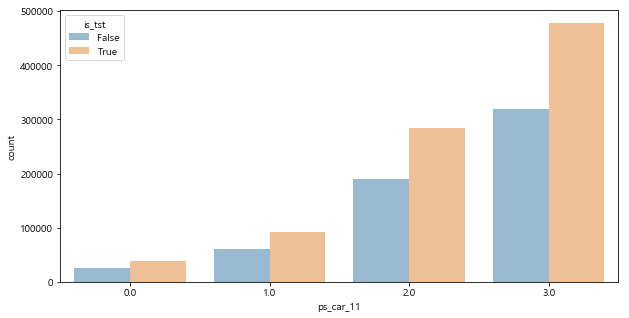

In [99]:
df["is_tst"] = df["target"].isnull()
for col in binary + category + integer:
    bar_plot(col, df, "is_tst")